**Load Dataset**

In [1]:
from torch.utils.data import Dataset
import os
import torch

#Load dari file simpanan hasil preproses dalam bentuk .pt
class ProcessedVideoDataset(Dataset):
    def __init__(self, pt_folder):
        self.pt_folder = pt_folder
        self.pt_files = [os.path.join(pt_folder, f) for f in os.listdir(pt_folder) if f.endswith('.pt')]
        self.file_list = sorted([
            f for f in os.listdir(pt_folder)
            if f.endswith('.pt')
        ])

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        file_path = os.path.join(self.pt_folder, self.file_list[idx])
        data = torch.load(file_path)

        #Load frame wajah dan labelnya
        frames = torch.stack(data['frames'])
        label = data['label']

        return frames, label

In [41]:
from torch.utils.data import DataLoader, random_split

pt_folder = 'Dataset Deepfake Preprocessed/Preprocessed Wajah'
full_dataset = ProcessedVideoDataset(pt_folder)

# Split 80/20
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=0)

In [ ]:
import os

# Simpan file list dari train_dataset dan val_dataset
train_files = [full_dataset.pt_files[i] for i in train_dataset.indices]
val_files = [full_dataset.pt_files[i] for i in val_dataset.indices]

with open("Dataset_Skripsi/train_split_wajah.txt", "w") as f:
    f.writelines(f"{fpath}\n" for fpath in train_files)

with open("Dataset_Skripsi/val_split_wajah.txt", "w") as f:
    f.writelines(f"{fpath}\n" for fpath in val_files)

In [10]:
class MultimodalDatasetFromList(Dataset):
    def __init__(self, list_path):
        with open(list_path, "r") as f:
            self.pt_files = [line.strip() for line in f.readlines()]

    def __len__(self):
        return len(self.pt_files)

    def __getitem__(self, idx):
        data = torch.load(self.pt_files[idx])
        return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)

In [11]:
from torch.utils.data import DataLoader, random_split

train_set = MultimodalDatasetFromList("Dataset_Skripsi/train_split_wajah.txt")
val_set   = MultimodalDatasetFromList("Dataset_Skripsi/val_split_wajah.txt")

train_loader = DataLoader(train_set, batch_size=4, shuffle=True, num_workers=0)
val_loader   = DataLoader(val_set, batch_size=4, shuffle=True, num_workers=0)

Load data grayscale dalam channel rgb

In [ ]:
from torch.utils.data import Dataset
import os
import torch

class ProcessedVideoDataset(Dataset):
    def __init__(self, pt_folder):
        self.pt_folder = pt_folder
        self.pt_files = [os.path.join(pt_folder, f) for f in os.listdir(pt_folder) if f.endswith('.pt')]
        self.file_list = sorted([
            f for f in os.listdir(pt_folder)
            if f.endswith('.pt')
        ])

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        file_path = os.path.join(self.pt_folder, self.file_list[idx])
        data = torch.load(file_path)

        frames = torch.stack(data['frames'])
        
        if frames.shape[1] == 1:
            # Ubah grayscale jadi RGB 3 channel
            frames = frames.repeat(1, 3, 1, 1)  # (T, 3, 224, 224)
            
        label = data['label']

        return frames, label

In [2]:
from torch.utils.data import DataLoader, random_split

pt_folder = 'Dataset_Skripsi/20_Frames_per_Second_Preprocessed_Visual_Wajah_GrayScale'
full_dataset = ProcessedVideoDataset(pt_folder)

# Split 80/20
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=0)

5 FPS dataset

In [8]:
# Cek panjang masing-masing
print(f"Jumlah data train: {len(train_dataset)}")
print(f"Jumlah data val  : {len(val_dataset)}")

# Lihat sample pertama dari train_set
frames, label = train_dataset[1]
print("=== TRAIN SET SAMPLE ===")
print(f"Frame shape: {frames.shape}")
print(f"Label      : {label} ({'REAL' if label == 0 else 'FACE-SWAP DEEPFAKE'})")

# Lihat sample pertama dari val_set
frames_val, label_val = val_dataset[1]
print("\n=== VALIDATION SET SAMPLE ===")
print(f"Frame shape: {frames_val.shape}")
print(f"Label      : {label_val} ({'REAL' if label_val == 0 else 'FACE-SWAP DEEPFAKE'})")

Jumlah data train: 238
Jumlah data val  : 60
=== TRAIN SET SAMPLE ===
Frame shape: torch.Size([50, 3, 224, 224])
Label      : 0 (REAL)

=== VALIDATION SET SAMPLE ===
Frame shape: torch.Size([50, 3, 224, 224])
Label      : 1 (FACE-SWAP DEEPFAKE)


**Preview Dataset**

Label: 0


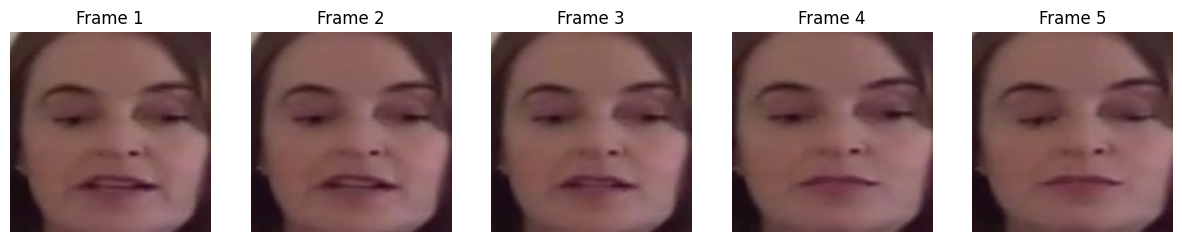

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk preview 1 sample dataset
def preview_dataset(dataset, idx=0):
    frames, label = dataset[idx]

    print(f"Label: {label}")

    # Tampilkan 5 frame pertama
    num_frames_to_show = min(5, frames.size(0))
    fig, axes = plt.subplots(1, num_frames_to_show, figsize=(15, 5))
    
    for i in range(num_frames_to_show):
        img = frames[i].permute(1, 2, 0).numpy()  # (H, W, 3)
        img = (img * 255).astype('uint8')

        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f"Frame {i+1}")

    plt.show()

# Contoh pakai train_dataset
preview_dataset(train_dataset, idx=22)

==========================

**ResNet18 Sequential Block Overview**

(1) Sequential Block Size 64

(2) Sequential Block Size 128

(3) Sequential Block Size 256

(4) Sequential Block Size 512

**Note : Buang Layer Pooling karena hanya mengambil layer konvolusi**

==========================

=========================================

**Coba Layer CNN**

=========================================

**Percobaan 1**

Full Sequential Block (512)

Weight Criterion 1:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F

# Load Model Fitur Extractor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        #model resnet18 dengan bobotnya
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        #hapus bagian classifiernya
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        #pool hasil per channelnya
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # (B*T, 512)
        return x.view(batch_size, time_steps, -1)  # (B, T, 512)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):  # x: (B, T, F)
        weights = self.attn(x).squeeze(-1)  # (B, T)
        #bobot tiap frame
        weights = torch.softmax(weights, dim=1)  # (B, T)
        #dijumlahkan menjadi fitur representatif
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)  # (B, F)
        return attended

#Load Model Pengolahan Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=512, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        attended = self.attention(x)  # (B, 2H)
        return attended

#Gabungan Model
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)  # (B, T, 512)
        visual_embed = self.bilstm(visual_feat_seq)      # (B, 512)
        #dari fitur representatif di klasifikasi
        out = self.classifier(visual_embed)
        return out

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [15]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([1.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [16]:
model.eval()

DeepfakeClassifier(
  (visual_extractor): ResNetFeatureExtractor(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    #ambil epoch dengan loss validasi terbaik
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_512-BiLSTM_2_Wajah_1R1F.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch [1/40] Train Loss: 0.7393 | Train Acc: 0.4739 | Val Loss: 0.6874 | Val Acc: 0.4925
Epoch [2/40] Train Loss: 0.6758 | Train Acc: 0.5522 | Val Loss: 0.7401 | Val Acc: 0.5373
Epoch [3/40] Train Loss: 0.6812 | Train Acc: 0.6119 | Val Loss: 0.6643 | Val Acc: 0.5672
Epoch [4/40] Train Loss: 0.6585 | Train Acc: 0.6082 | Val Loss: 0.6608 | Val Acc: 0.5522
Epoch [5/40] Train Loss: 0.5759 | Train Acc: 0.7201 | Val Loss: 0.5954 | Val Acc: 0.7164
Epoch [6/40] Train Loss: 0.6999 | Train Acc: 0.5634 | Val Loss: 0.6833 | Val Acc: 0.5522
Epoch [7/40] Train Loss: 0.6689 | Train Acc: 0.6231 | Val Loss: 0.6693 | Val Acc: 0.6269
Epoch [8/40] Train Loss: 0.5945 | Train Acc: 0.6978 | Val Loss: 0.6269 | Val Acc: 0.6567
Epoch [9/40] Train Loss: 0.5926 | Train Acc: 0.6903 | Val Loss: 0.6730 | Val Acc: 0.5821
Epoch [10/40] Train Loss: 0.5436 | Train Acc: 0.7537 | Val Loss: 0.7239 | Val Acc: 0.5672
Epoch [11/40] Train Loss: 0.5349 | Train Acc: 0.7500 | Val Loss: 0.5478 | Val Acc: 0.7015
Epoch [12/40] Train

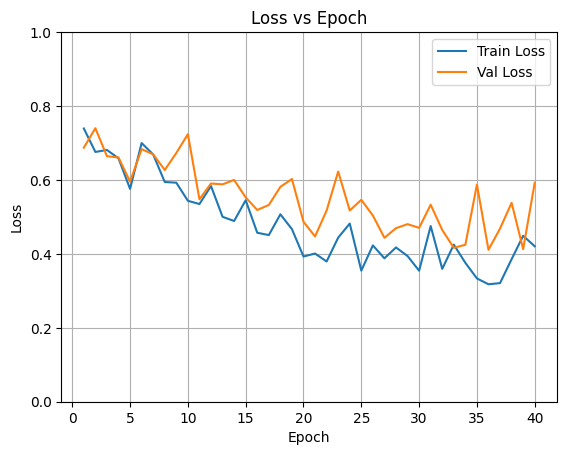

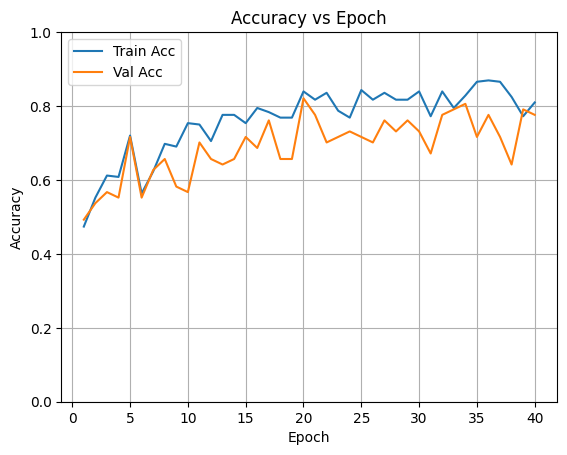

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


aabyjxwqyo.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bfkzrgovsv.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bqwwkjlmgv.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWA

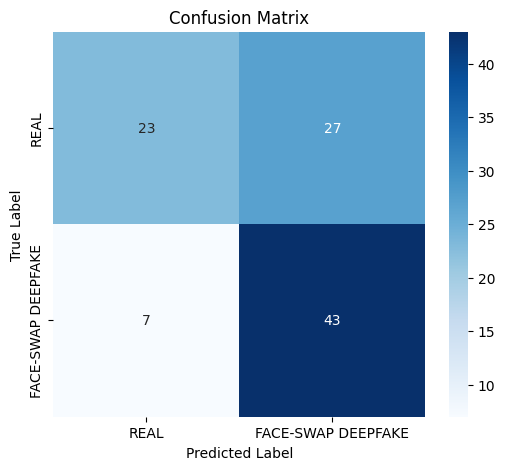


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.77      0.46      0.57        50
FACE-SWAP DEEPFAKE       0.61      0.86      0.72        50

          accuracy                           0.66       100
         macro avg       0.69      0.66      0.65       100
      weighted avg       0.69      0.66      0.65       100


📈 AUC Score: 0.6952


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


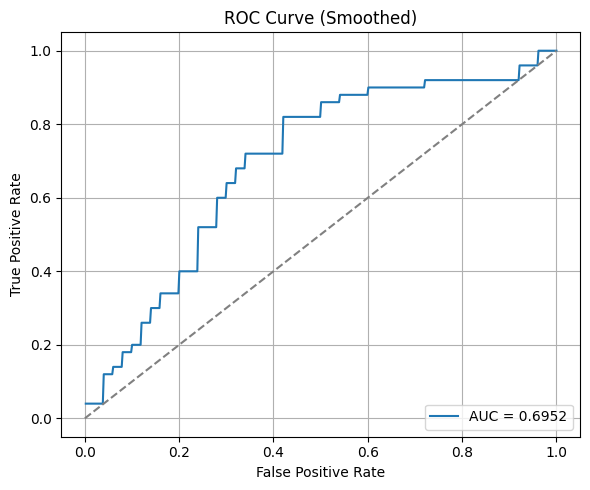

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device ganti ke gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi Model dan Dataset Testing
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_512-BiLSTM_2_Wajah_1R1F.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)  # (1, T, 3, 224, 224)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])  # Simpan prob kelas 1 (DEEPFAKE)

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Percobaan 2**

Full Sequential Block (512)

Weight Criterion 2:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F

# Load Model Fitur Extractor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        #model resnet18 dengan bobotnya
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        #hapus bagian classifiernya
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        #pool hasil per channelnya
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # (B*T, 512)
        return x.view(batch_size, time_steps, -1)  # (B, T, 512)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):  # x: (B, T, F)
        weights = self.attn(x).squeeze(-1)  # (B, T)
        #bobot tiap frame
        weights = torch.softmax(weights, dim=1)  # (B, T)
        #dijumlahkan menjadi fitur representatif
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)  # (B, F)
        return attended

#Load Model Pengolahan Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=512, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        attended = self.attention(x)  # (B, 2H)
        return attended

#Gabungan Model
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)  # (B, T, 512)
        visual_embed = self.bilstm(visual_feat_seq)      # (B, 512)
        #dari fitur representatif di klasifikasi
        out = self.classifier(visual_embed)
        return out

In [29]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    #ambil epoch dengan loss validasi terbaik
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_512-BiLSTM_2_Wajah_2R1F.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

Epoch [1/40] Train Loss: 0.6909 | Train Acc: 0.5597 | Val Loss: 0.6318 | Val Acc: 0.5224
Epoch [2/40] Train Loss: 0.6450 | Train Acc: 0.5299 | Val Loss: 0.6192 | Val Acc: 0.5672
Epoch [3/40] Train Loss: 0.6488 | Train Acc: 0.5784 | Val Loss: 0.6005 | Val Acc: 0.5672
Epoch [4/40] Train Loss: 0.6076 | Train Acc: 0.6231 | Val Loss: 0.5625 | Val Acc: 0.6418
Epoch [5/40] Train Loss: 0.5970 | Train Acc: 0.6530 | Val Loss: 0.5557 | Val Acc: 0.6119
Epoch [6/40] Train Loss: 0.5113 | Train Acc: 0.7090 | Val Loss: 0.5183 | Val Acc: 0.6866
Epoch [7/40] Train Loss: 0.5182 | Train Acc: 0.7201 | Val Loss: 0.5966 | Val Acc: 0.6119
Epoch [8/40] Train Loss: 0.5713 | Train Acc: 0.6418 | Val Loss: 0.5889 | Val Acc: 0.7164
Epoch [9/40] Train Loss: 0.4917 | Train Acc: 0.7575 | Val Loss: 0.5027 | Val Acc: 0.6418
Epoch [10/40] Train Loss: 0.4923 | Train Acc: 0.7463 | Val Loss: 0.4750 | Val Acc: 0.7164
Epoch [11/40] Train Loss: 0.4692 | Train Acc: 0.7276 | Val Loss: 0.5359 | Val Acc: 0.5970
Epoch [12/40] Train

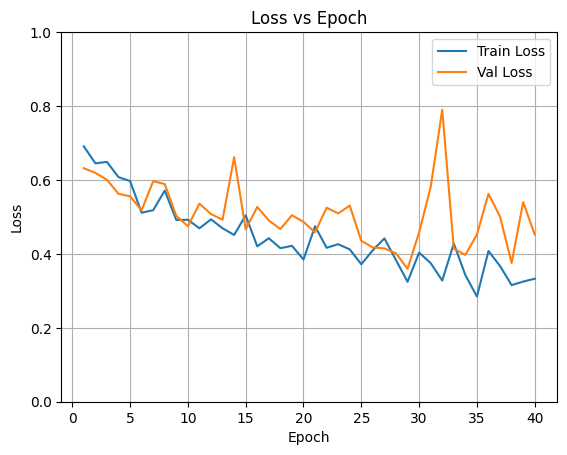

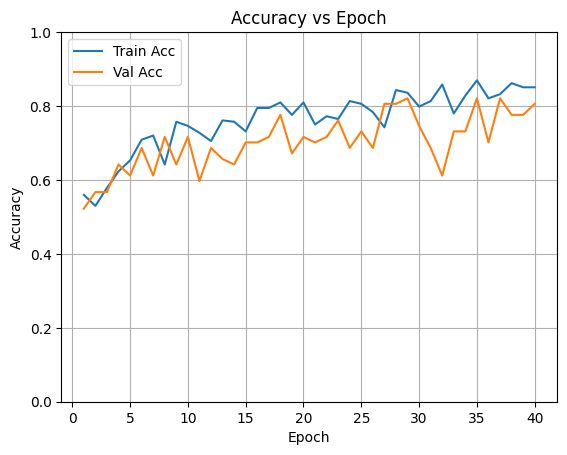

In [31]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Accuracy plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bqwwkjlmgv.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = REAL, True = REAL


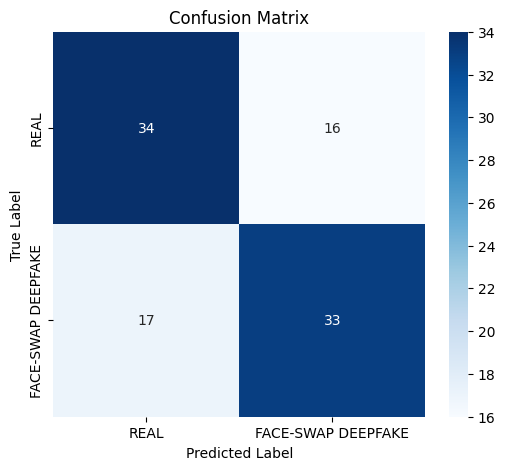


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.67      0.68      0.67        50
FACE-SWAP DEEPFAKE       0.67      0.66      0.67        50

          accuracy                           0.67       100
         macro avg       0.67      0.67      0.67       100
      weighted avg       0.67      0.67      0.67       100


📈 AUC Score: 0.7092


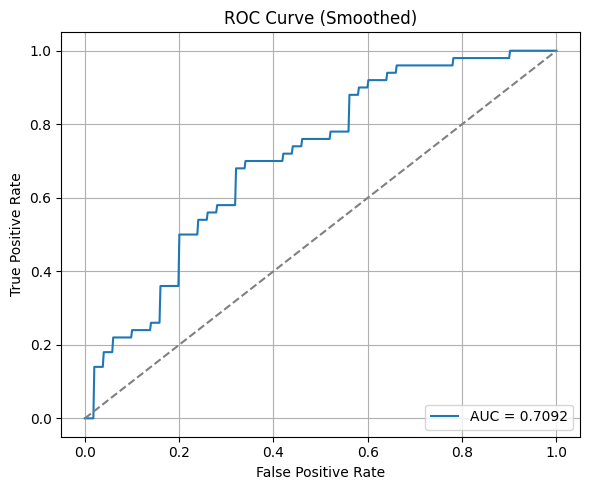

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device agar menjadi gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_512-BiLSTM_2_Wajah_2R1F.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []  # Simpan probabilitas kelas DEEPFAKE (1)

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)  # (1, T, 3, 224, 224)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])  # Simpan prob kelas 1 (DEEPFAKE)

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    # Interpolasi
    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

====================================

**Percobaan 3**

Sequential Block (256)

Weight Criterion 1:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F

# Load Model Fitur Extractor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        #kurangin layer 512
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-3])
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # (B*T, 512)
        return x.view(batch_size, time_steps, -1)  # (B, T, 512)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):  # x: (B, T, F)
        weights = self.attn(x).squeeze(-1)  # (B, T)
        weights = torch.softmax(weights, dim=1)  # (B, T)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)  # (B, F)
        return attended

#Load Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=256, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        attended = self.attention(x)  # (B, 2H)
        return attended

class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)  # (B, T, 512)
        visual_embed = self.bilstm(visual_feat_seq)      # (B, 512)
        out = self.classifier(visual_embed)
        return out

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([1.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [35]:
model.eval()

DeepfakeClassifier(
  (visual_extractor): ResNetFeatureExtractor(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    #Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    #Ambil validasi loss terbaik
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_256-BiLSTM_2_Wajah_1R1F.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

Epoch [1/40] Train Loss: 0.7263 | Train Acc: 0.4963 | Val Loss: 0.7294 | Val Acc: 0.4627
Epoch [2/40] Train Loss: 0.7159 | Train Acc: 0.4851 | Val Loss: 0.6923 | Val Acc: 0.7313
Epoch [3/40] Train Loss: 0.6982 | Train Acc: 0.4851 | Val Loss: 0.7153 | Val Acc: 0.4627
Epoch [4/40] Train Loss: 0.7034 | Train Acc: 0.5149 | Val Loss: 0.7359 | Val Acc: 0.4627
Epoch [5/40] Train Loss: 0.7154 | Train Acc: 0.4963 | Val Loss: 0.7221 | Val Acc: 0.4627
Epoch [6/40] Train Loss: 0.7016 | Train Acc: 0.4851 | Val Loss: 0.6906 | Val Acc: 0.5373
Epoch [7/40] Train Loss: 0.6954 | Train Acc: 0.4851 | Val Loss: 0.7000 | Val Acc: 0.4627
Epoch [8/40] Train Loss: 0.7015 | Train Acc: 0.5187 | Val Loss: 0.6886 | Val Acc: 0.5373
Epoch [9/40] Train Loss: 0.7047 | Train Acc: 0.5224 | Val Loss: 0.6899 | Val Acc: 0.5373
Epoch [10/40] Train Loss: 0.6932 | Train Acc: 0.5187 | Val Loss: 0.6860 | Val Acc: 0.5373
Epoch [11/40] Train Loss: 0.6919 | Train Acc: 0.5410 | Val Loss: 0.6824 | Val Acc: 0.6716
Epoch [12/40] Train

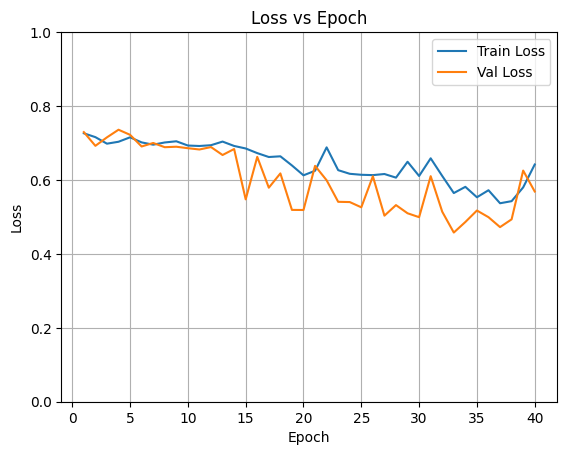

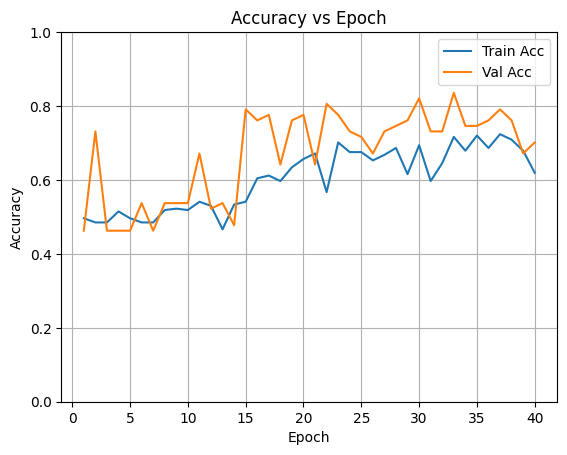

In [6]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Accuracy plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = REAL, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = REAL, True = REAL
bqwwkjlmgv.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = FACE-SWAP DEEPFAKE

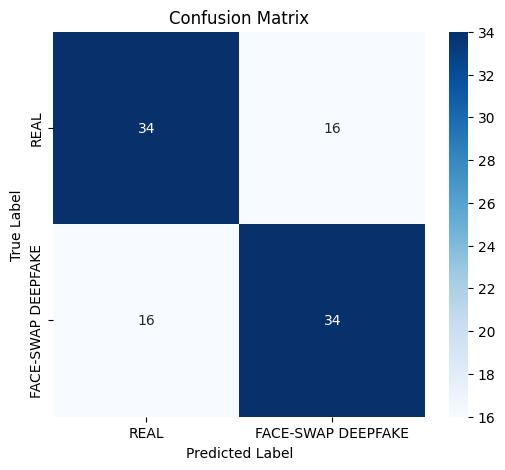


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.68      0.68      0.68        50
FACE-SWAP DEEPFAKE       0.68      0.68      0.68        50

          accuracy                           0.68       100
         macro avg       0.68      0.68      0.68       100
      weighted avg       0.68      0.68      0.68       100


📈 AUC Score: 0.7224


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


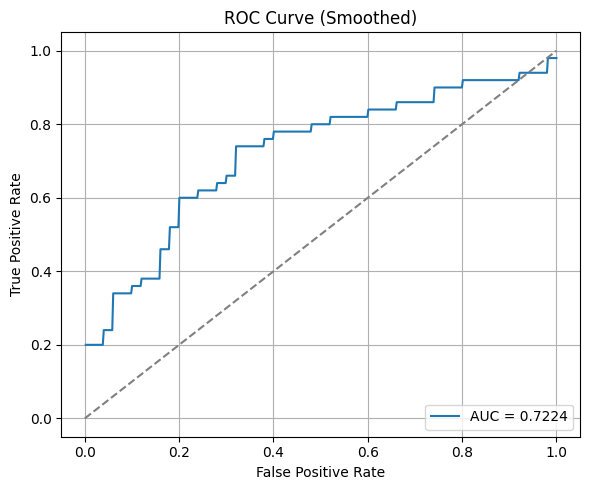

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_256-BiLSTM_2_Wajah_1R1F.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []  # Simpan probabilitas kelas DEEPFAKE (1)

# === Loop seluruh file ===
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)  # (1, T, 3, 224, 224)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])  # Simpan prob kelas 1 (DEEPFAKE)

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# === Accuracy ===
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# === Confusion Matrix ===
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Percobaan 4**

Sequential Block (256)

Weight Criterion 2:1

In [10]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # save model validasi loss terbaik
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_256-BiLSTM_2_Wajah_2R1F.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

Epoch [1/40] Train Loss: 0.6812 | Train Acc: 0.5112 | Val Loss: 0.6862 | Val Acc: 0.4627
Epoch [2/40] Train Loss: 0.6574 | Train Acc: 0.5112 | Val Loss: 0.7256 | Val Acc: 0.4627
Epoch [3/40] Train Loss: 0.6638 | Train Acc: 0.5187 | Val Loss: 0.6947 | Val Acc: 0.4627
Epoch [4/40] Train Loss: 0.6725 | Train Acc: 0.5410 | Val Loss: 0.7347 | Val Acc: 0.4627
Epoch [5/40] Train Loss: 0.6752 | Train Acc: 0.5261 | Val Loss: 0.7046 | Val Acc: 0.4627
Epoch [6/40] Train Loss: 0.6556 | Train Acc: 0.5187 | Val Loss: 0.6924 | Val Acc: 0.4627
Epoch [7/40] Train Loss: 0.6639 | Train Acc: 0.5187 | Val Loss: 0.6842 | Val Acc: 0.4627
Epoch [8/40] Train Loss: 0.6605 | Train Acc: 0.5112 | Val Loss: 0.7183 | Val Acc: 0.4627
Epoch [9/40] Train Loss: 0.6633 | Train Acc: 0.5149 | Val Loss: 0.6954 | Val Acc: 0.4627
Epoch [10/40] Train Loss: 0.6553 | Train Acc: 0.5224 | Val Loss: 0.6953 | Val Acc: 0.4627
Epoch [11/40] Train Loss: 0.6499 | Train Acc: 0.5187 | Val Loss: 0.6667 | Val Acc: 0.4627
Epoch [12/40] Train

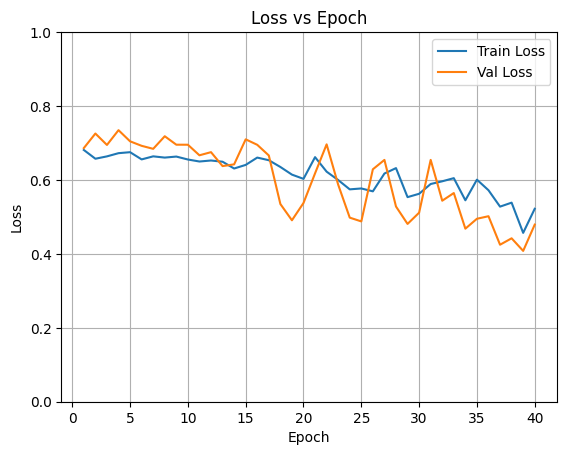

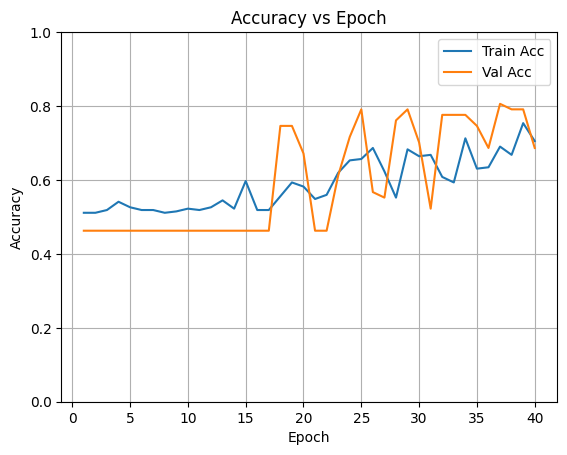

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = REAL, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = REAL, True = REAL
bqwwkjlmgv.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = REAL, True = REAL
chnbexdyhq.pt: Predicted = REAL, True = REAL
cmbloezomc.pt: Predicted 

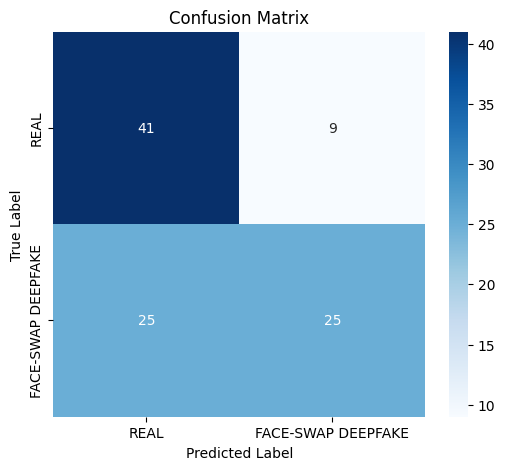


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.62      0.82      0.71        50
FACE-SWAP DEEPFAKE       0.74      0.50      0.60        50

          accuracy                           0.66       100
         macro avg       0.68      0.66      0.65       100
      weighted avg       0.68      0.66      0.65       100


📈 AUC Score: 0.7064


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


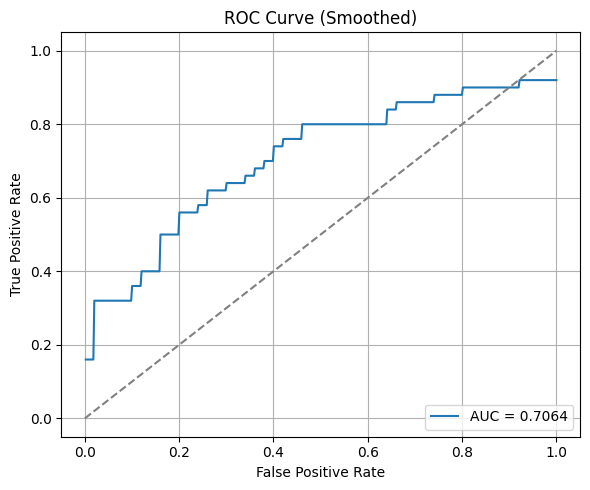

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_256-BiLSTM_2_Wajah_2R1F.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Accuracy
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Percobaan 5**

Sequential Block (128)

Weight Criterion 1:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F

# Model fitur ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-4])
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # (B*T, 512)
        return x.view(batch_size, time_steps, -1)  # (B, T, 512)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):  # x: (B, T, F)
        weights = self.attn(x).squeeze(-1)  # (B, T)
        weights = torch.softmax(weights, dim=1)  # (B, T)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)  # (B, F)
        return attended

# Model fitur temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=128, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        attended = self.attention(x)  # (B, 2H)
        return attended

# Model gabungan fitur ekstraktor dan fitur temporal
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)  # (B, T, 512)
        visual_embed = self.bilstm(visual_feat_seq)      # (B, 512)
        out = self.classifier(visual_embed)
        return out

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([1.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [18]:
model.eval()

DeepfakeClassifier(
  (visual_extractor): ResNetFeatureExtractor(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model dengan val loss terbaik agar stabil
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_128-BiLSTM_2_Wajah_1R1F.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_469592\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)


Epoch [1/40] Train Loss: 0.7225 | Train Acc: 0.4627 | Val Loss: 0.6960 | Val Acc: 0.4478
Epoch [2/40] Train Loss: 0.7174 | Train Acc: 0.4590 | Val Loss: 0.6951 | Val Acc: 0.4478
Epoch [3/40] Train Loss: 0.6978 | Train Acc: 0.5261 | Val Loss: 0.7120 | Val Acc: 0.4478
Epoch [4/40] Train Loss: 0.7048 | Train Acc: 0.4963 | Val Loss: 0.6905 | Val Acc: 0.5522
Epoch [5/40] Train Loss: 0.7040 | Train Acc: 0.4701 | Val Loss: 0.6967 | Val Acc: 0.4478
Epoch [6/40] Train Loss: 0.7041 | Train Acc: 0.4963 | Val Loss: 0.7040 | Val Acc: 0.4478
Epoch [7/40] Train Loss: 0.6995 | Train Acc: 0.4851 | Val Loss: 0.7022 | Val Acc: 0.4478
Epoch [8/40] Train Loss: 0.6882 | Train Acc: 0.5373 | Val Loss: 0.6914 | Val Acc: 0.5522
Epoch [9/40] Train Loss: 0.7039 | Train Acc: 0.5149 | Val Loss: 0.7180 | Val Acc: 0.4478
Epoch [10/40] Train Loss: 0.6960 | Train Acc: 0.5299 | Val Loss: 0.6997 | Val Acc: 0.4478
Epoch [11/40] Train Loss: 0.6971 | Train Acc: 0.5000 | Val Loss: 0.6920 | Val Acc: 0.5373
Epoch [12/40] Train

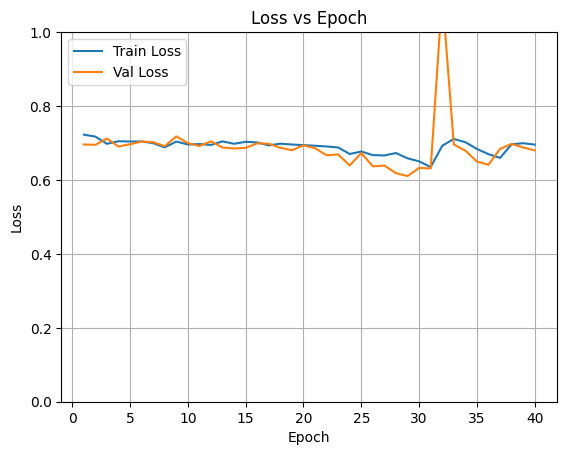

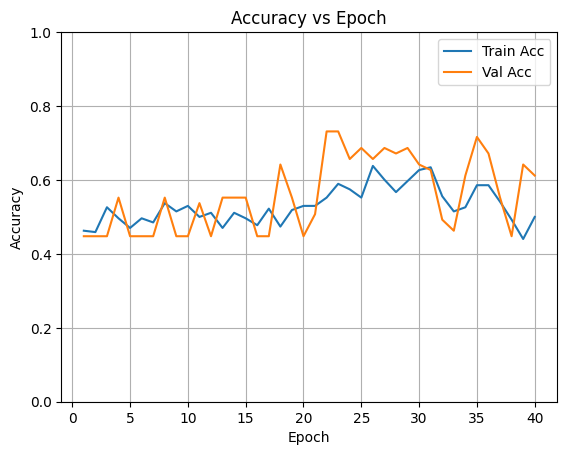

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = REAL, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = REAL, True = REAL
bqwwkjlmgv.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = REAL, True = REAL
chnbexdyhq.pt:

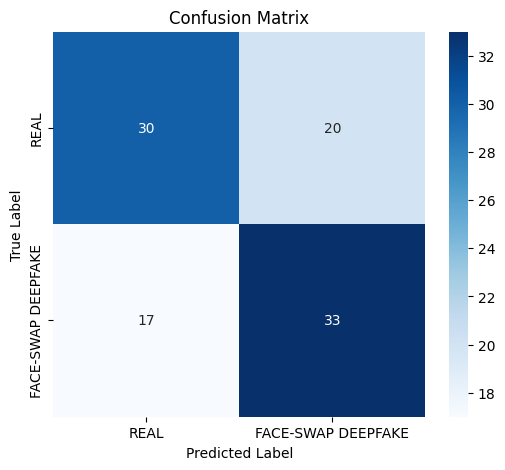


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.64      0.60      0.62        50
FACE-SWAP DEEPFAKE       0.62      0.66      0.64        50

          accuracy                           0.63       100
         macro avg       0.63      0.63      0.63       100
      weighted avg       0.63      0.63      0.63       100


📈 AUC Score: 0.6924


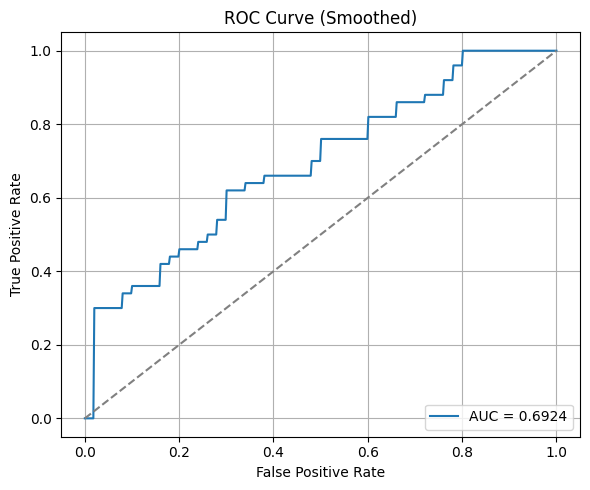

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_128-BiLSTM_2_Wajah_1R1F.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []  # Simpan probabilitas kelas DEEPFAKE (1)

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)
    
    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Percobaan 6**

Full Sequential Block (128)

Weight Criterion 2:1

In [10]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model dengan validasi loss terbaik
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_128-BiLSTM_2_Wajah_2R1F.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_469592\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)


Epoch [1/40] Train Loss: 0.6921 | Train Acc: 0.4963 | Val Loss: 0.6406 | Val Acc: 0.5522
Epoch [2/40] Train Loss: 0.6720 | Train Acc: 0.4888 | Val Loss: 0.6325 | Val Acc: 0.5522
Epoch [3/40] Train Loss: 0.6844 | Train Acc: 0.4888 | Val Loss: 0.6259 | Val Acc: 0.5522
Epoch [4/40] Train Loss: 0.6584 | Train Acc: 0.4963 | Val Loss: 0.6240 | Val Acc: 0.5522
Epoch [5/40] Train Loss: 0.6553 | Train Acc: 0.5037 | Val Loss: 0.6226 | Val Acc: 0.5522
Epoch [6/40] Train Loss: 0.6632 | Train Acc: 0.5000 | Val Loss: 0.6418 | Val Acc: 0.5522
Epoch [7/40] Train Loss: 0.6811 | Train Acc: 0.4925 | Val Loss: 0.6242 | Val Acc: 0.5522
Epoch [8/40] Train Loss: 0.6655 | Train Acc: 0.4925 | Val Loss: 0.6470 | Val Acc: 0.5522
Epoch [9/40] Train Loss: 0.6738 | Train Acc: 0.5037 | Val Loss: 0.6348 | Val Acc: 0.5522
Epoch [10/40] Train Loss: 0.6665 | Train Acc: 0.5037 | Val Loss: 0.6251 | Val Acc: 0.5522
Epoch [11/40] Train Loss: 0.6762 | Train Acc: 0.4963 | Val Loss: 0.6303 | Val Acc: 0.5522
Epoch [12/40] Train

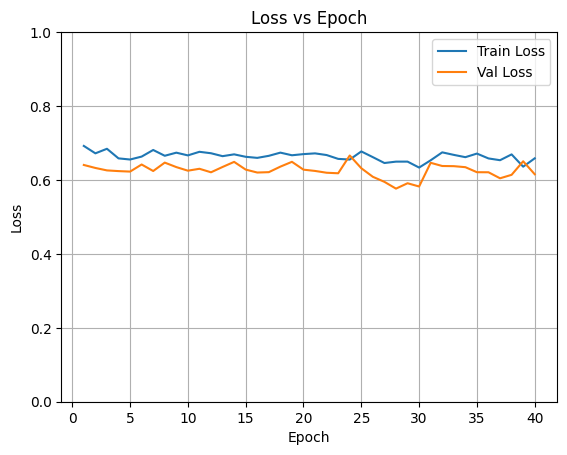

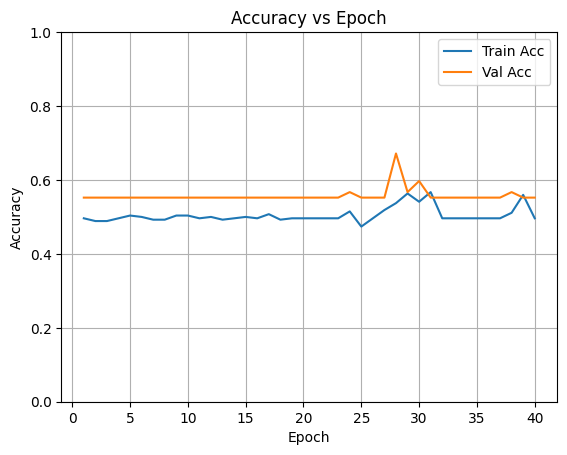

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = REAL, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = REAL, True = REAL
bqwwkjlmgv.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = REAL, True = REAL
chnbexdyhq.pt: Predicted = REAL, True = REAL
cmbloezomc.pt: Predicted = FACE-SWAP DE

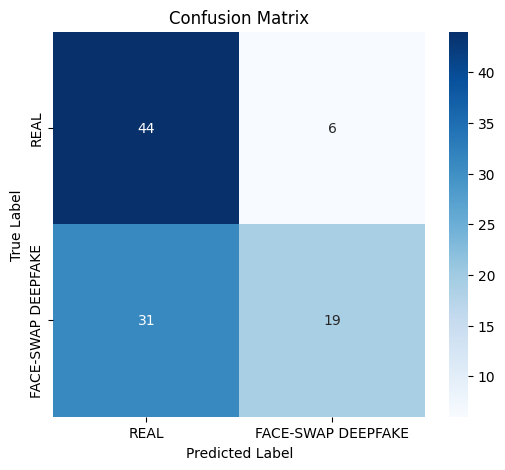


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.59      0.88      0.70        50
FACE-SWAP DEEPFAKE       0.76      0.38      0.51        50

          accuracy                           0.63       100
         macro avg       0.67      0.63      0.61       100
      weighted avg       0.67      0.63      0.61       100


📈 AUC Score: 0.6920


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


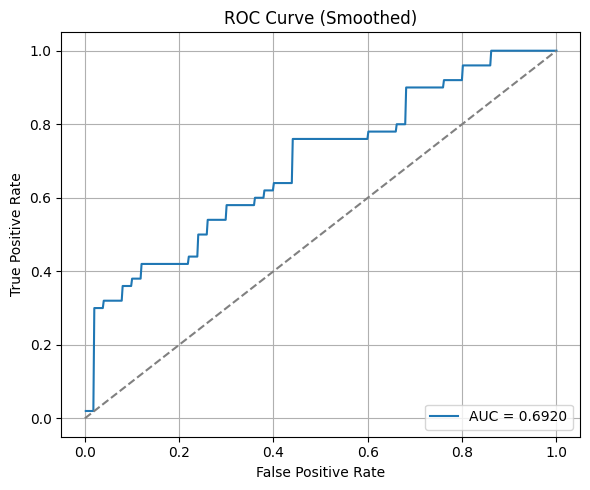

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_128-BiLSTM_2_Wajah_2R1F.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# === Loop seluruh file ===
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Percobaan 7**

Full Sequential Block (64)

Weight Criterion 1:1

In [12]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-5])
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return x.view(batch_size, time_steps, -1)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=64, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        attended = self.attention(x)
        return attended

# Model Gabungan Fitur Ekstraktor dan Fitur Temporal
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)  # (B, T, 512)
        visual_embed = self.bilstm(visual_feat_seq)      # (B, 512)
        out = self.classifier(visual_embed)
        return out

In [13]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([1.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [14]:
model.eval()

DeepfakeClassifier(
  (visual_extractor): ResNetFeatureExtractor(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    #Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save Model validasi loss terbaik
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_64-BiLSTM_2_Wajah_1R1F.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_507216\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)


Epoch [1/40] Train Loss: 0.7338 | Train Acc: 0.4739 | Val Loss: 0.6891 | Val Acc: 0.5522
Epoch [2/40] Train Loss: 0.6977 | Train Acc: 0.4925 | Val Loss: 0.7371 | Val Acc: 0.4478
Epoch [3/40] Train Loss: 0.7087 | Train Acc: 0.5187 | Val Loss: 0.6906 | Val Acc: 0.5522
Epoch [4/40] Train Loss: 0.7055 | Train Acc: 0.5037 | Val Loss: 0.7011 | Val Acc: 0.4478
Epoch [5/40] Train Loss: 0.7071 | Train Acc: 0.4366 | Val Loss: 0.6911 | Val Acc: 0.5522
Epoch [6/40] Train Loss: 0.7012 | Train Acc: 0.4813 | Val Loss: 0.6895 | Val Acc: 0.5522
Epoch [7/40] Train Loss: 0.6959 | Train Acc: 0.5112 | Val Loss: 0.6882 | Val Acc: 0.5522
Epoch [8/40] Train Loss: 0.7034 | Train Acc: 0.5373 | Val Loss: 0.6960 | Val Acc: 0.5522
Epoch [9/40] Train Loss: 0.7037 | Train Acc: 0.4664 | Val Loss: 0.6920 | Val Acc: 0.5522
Epoch [10/40] Train Loss: 0.6947 | Train Acc: 0.5224 | Val Loss: 0.7050 | Val Acc: 0.4478
Epoch [11/40] Train Loss: 0.7064 | Train Acc: 0.4739 | Val Loss: 0.6974 | Val Acc: 0.4478
Epoch [12/40] Train

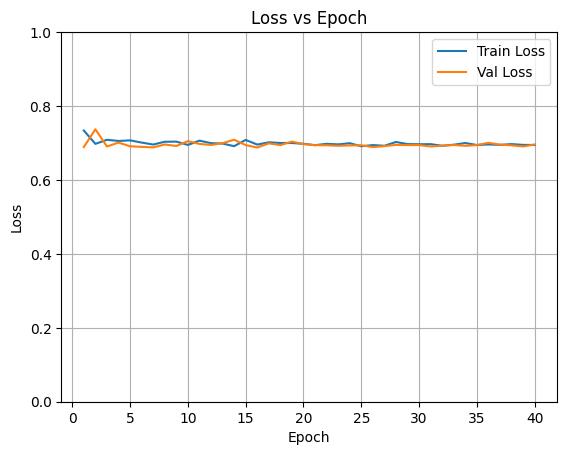

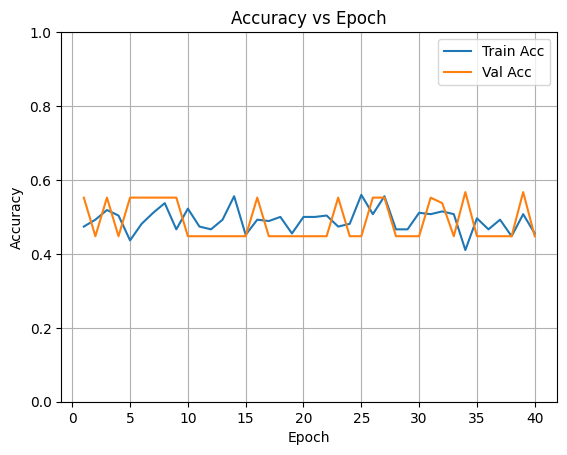

In [16]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = REAL, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = REAL, True = REAL
bqwwkjlmgv.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = REAL, True = REAL
chnbexdyhq.pt: Predicted = REAL, True = REAL
cmbloezomc.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
cuewtjauyi.pt: Predict

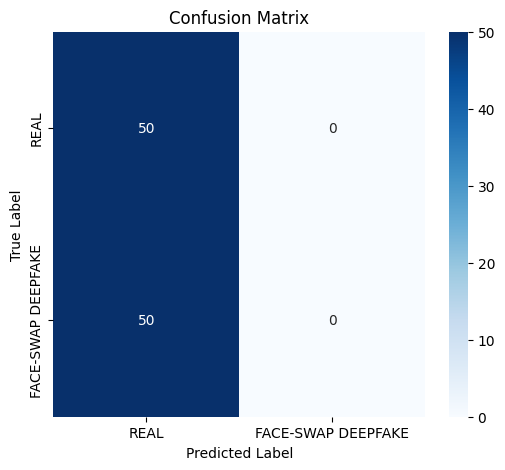


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.50      1.00      0.67        50
FACE-SWAP DEEPFAKE       0.00      0.00      0.00        50

          accuracy                           0.50       100
         macro avg       0.25      0.50      0.33       100
      weighted avg       0.25      0.50      0.33       100


📈 AUC Score: 0.6668


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

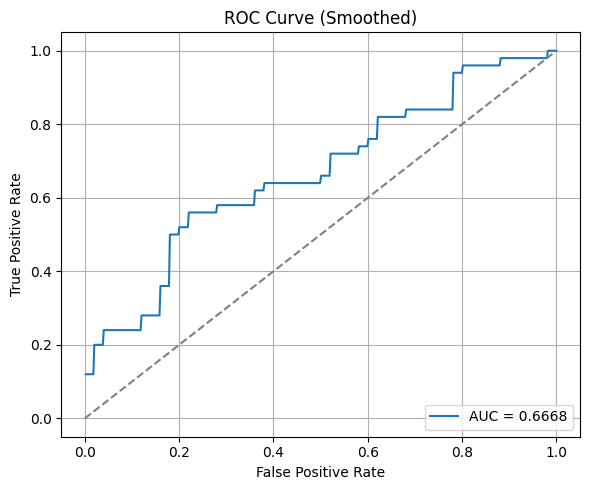

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_64-BiLSTM_2_Wajah_1R1F.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device) 

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1]) 

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)
    
    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Percobaan 8**

Full Sequential Block (64)

Weight Criterion 2:1

In [18]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model dengan val loss terbaik
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_64-BiLSTM_2_Wajah_2R1F.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_507216\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)


Epoch [1/40] Train Loss: 0.6857 | Train Acc: 0.5112 | Val Loss: 0.6273 | Val Acc: 0.5522
Epoch [2/40] Train Loss: 0.6834 | Train Acc: 0.5037 | Val Loss: 0.6755 | Val Acc: 0.5522
Epoch [3/40] Train Loss: 0.6715 | Train Acc: 0.4925 | Val Loss: 0.6502 | Val Acc: 0.5522
Epoch [4/40] Train Loss: 0.6828 | Train Acc: 0.5075 | Val Loss: 0.6519 | Val Acc: 0.5522
Epoch [5/40] Train Loss: 0.6856 | Train Acc: 0.4925 | Val Loss: 0.6311 | Val Acc: 0.5522
Epoch [6/40] Train Loss: 0.6684 | Train Acc: 0.4963 | Val Loss: 0.6278 | Val Acc: 0.5522
Epoch [7/40] Train Loss: 0.6735 | Train Acc: 0.5037 | Val Loss: 0.6260 | Val Acc: 0.5522
Epoch [8/40] Train Loss: 0.6617 | Train Acc: 0.5000 | Val Loss: 0.6302 | Val Acc: 0.5522
Epoch [9/40] Train Loss: 0.6691 | Train Acc: 0.4963 | Val Loss: 0.6569 | Val Acc: 0.5522
Epoch [10/40] Train Loss: 0.6678 | Train Acc: 0.4963 | Val Loss: 0.6317 | Val Acc: 0.5522
Epoch [11/40] Train Loss: 0.6695 | Train Acc: 0.4963 | Val Loss: 0.6301 | Val Acc: 0.5522
Epoch [12/40] Train

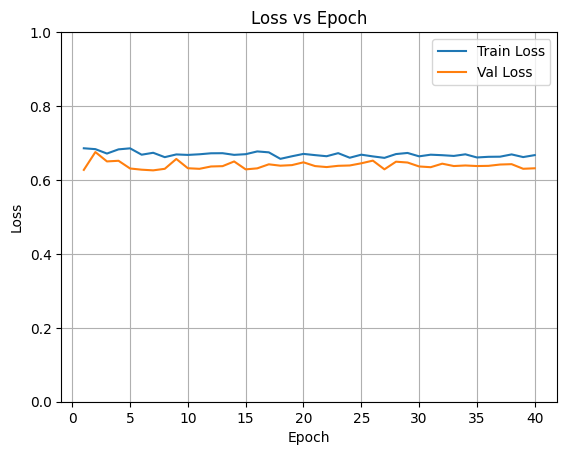

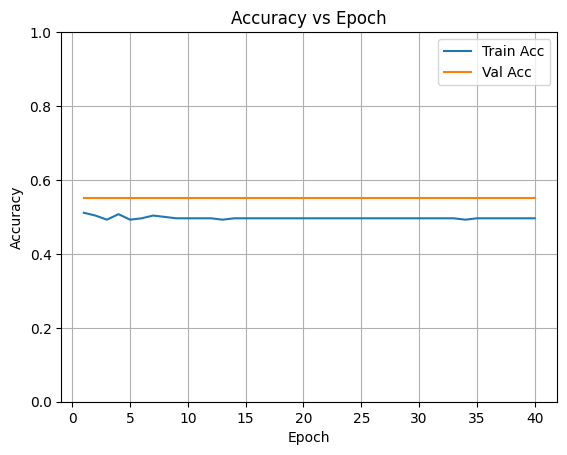

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = REAL, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = REAL, True = REAL
bqwwkjlmgv.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = REAL, True = REAL
chnbexdyhq.pt: Predicted = REAL, True = REAL
cmbloezomc.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
cuewtjauyi.pt: Predict

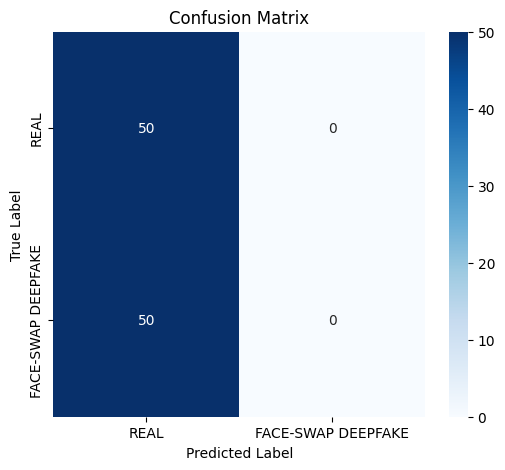


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.50      1.00      0.67        50
FACE-SWAP DEEPFAKE       0.00      0.00      0.00        50

          accuracy                           0.50       100
         macro avg       0.25      0.50      0.33       100
      weighted avg       0.25      0.50      0.33       100


📈 AUC Score: 0.7624


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

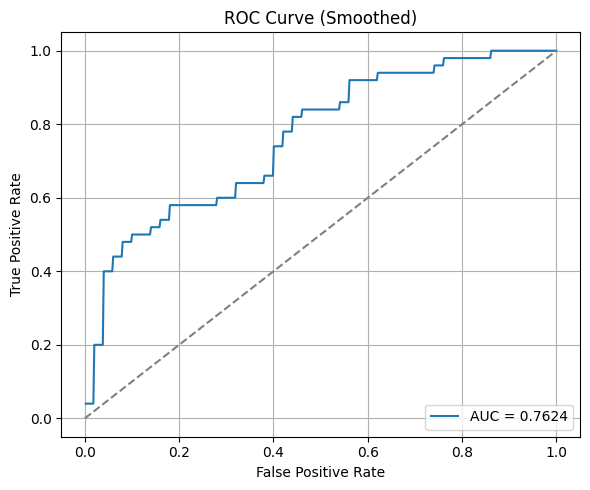

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_64-BiLSTM_2_Wajah_2R1F.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Coba Tambah Layer**

**Percobaan 18**

Full Sequential Block (512) + Additional Block (1024)

Learning Rate 1e-4

40 epochs

Weight Criterion 2:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        # Tambahkan blok baru (512 → 1024)
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(
                inplanes=1024,
                planes=1024,
                stride=1
            )
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x) 
        x = self.extra_block(x) 
        x = self.pool(x)
        x = x.view(x.size(0), -1)      # (B*T, 1024)
        return x.view(batch_size, time_steps, -1)  # (B, T, 1024)
    
class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=512, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        attended = self.attention(x)
        return attended

# Model Gabungan Fitur
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
model.eval()

DeepfakeClassifier(
  (visual_extractor): ResNetFeatureExtractor(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_2_Wajah_2R1F.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_469592\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)


Epoch [1/40] Train Loss: 0.6824 | Train Acc: 0.5336 | Val Loss: 0.6095 | Val Acc: 0.6418
Epoch [2/40] Train Loss: 0.5642 | Train Acc: 0.6679 | Val Loss: 0.7248 | Val Acc: 0.7015
Epoch [3/40] Train Loss: 0.5706 | Train Acc: 0.6679 | Val Loss: 0.5187 | Val Acc: 0.7463
Epoch [4/40] Train Loss: 0.5289 | Train Acc: 0.7090 | Val Loss: 0.5120 | Val Acc: 0.7463
Epoch [5/40] Train Loss: 0.5927 | Train Acc: 0.7127 | Val Loss: 0.4942 | Val Acc: 0.7164
Epoch [6/40] Train Loss: 0.5025 | Train Acc: 0.7463 | Val Loss: 0.4576 | Val Acc: 0.8060
Epoch [7/40] Train Loss: 0.5636 | Train Acc: 0.7164 | Val Loss: 0.4502 | Val Acc: 0.8060
Epoch [8/40] Train Loss: 0.4883 | Train Acc: 0.8172 | Val Loss: 0.4293 | Val Acc: 0.8209
Epoch [9/40] Train Loss: 0.4887 | Train Acc: 0.7836 | Val Loss: 0.4325 | Val Acc: 0.8060
Epoch [10/40] Train Loss: 0.4854 | Train Acc: 0.7836 | Val Loss: 0.4465 | Val Acc: 0.7463
Epoch [11/40] Train Loss: 0.5084 | Train Acc: 0.7388 | Val Loss: 0.3845 | Val Acc: 0.8209
Epoch [12/40] Train

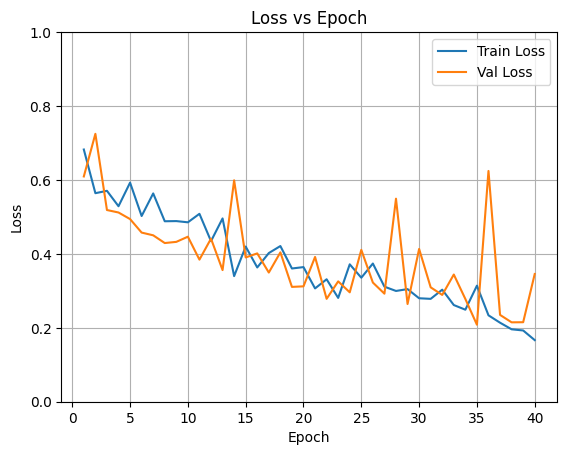

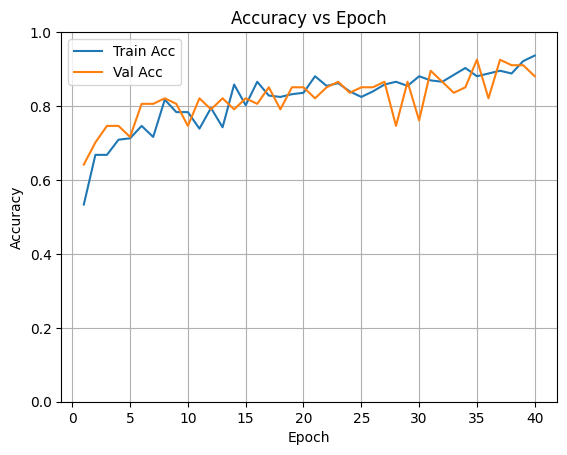

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bqwwkjlmgv.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = FACE

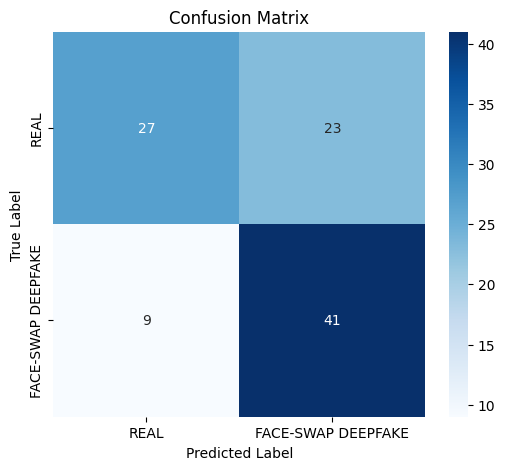


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.75      0.54      0.63        50
FACE-SWAP DEEPFAKE       0.64      0.82      0.72        50

          accuracy                           0.68       100
         macro avg       0.70      0.68      0.67       100
      weighted avg       0.70      0.68      0.67       100


📈 AUC Score: 0.7340


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


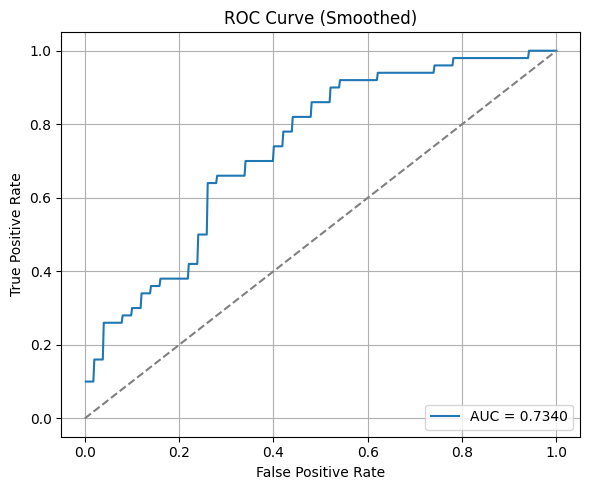

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_2_Wajah_2R1F.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

=========================================

**Coba Layer BiLSTM**

1 Layer BiLSTM, 3 Layer BiLSTM

=========================================

**Percobaan 25**

Full Sequential Block (512) + Additional Block (1024)

Coba Learning Rate 1e-4

1 BiLSTM

Weight Criterion 2:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        # Tambahkan blok baru (512 → 1024)
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(
                inplanes=1024,
                planes=1024,
                stride=1
            )
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.extra_block(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)      # (B*T, 1024)
        return x.view(batch_size, time_steps, -1)  # (B, T, 1024)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)  # (B, F)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        attended = self.attention(x)  # (B, 2H)
        return attended

# Model Gabungan Fitur
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

In [8]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

In [9]:
model.eval()

DeepfakeClassifier(
  (visual_extractor): ResNetFeatureExtractor(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_1_Wajah_2R1F.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_469592\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)


Epoch [1/40] Train Loss: 0.6313 | Train Acc: 0.6045 | Val Loss: 0.5203 | Val Acc: 0.7015
Epoch [2/40] Train Loss: 0.5706 | Train Acc: 0.7127 | Val Loss: 0.6554 | Val Acc: 0.6269
Epoch [3/40] Train Loss: 0.5717 | Train Acc: 0.7090 | Val Loss: 0.4632 | Val Acc: 0.8060
Epoch [4/40] Train Loss: 0.4916 | Train Acc: 0.7500 | Val Loss: 0.5895 | Val Acc: 0.7164
Epoch [5/40] Train Loss: 0.5090 | Train Acc: 0.7575 | Val Loss: 0.3346 | Val Acc: 0.8060
Epoch [6/40] Train Loss: 0.4906 | Train Acc: 0.7575 | Val Loss: 0.4337 | Val Acc: 0.7910
Epoch [7/40] Train Loss: 0.4489 | Train Acc: 0.7910 | Val Loss: 0.3016 | Val Acc: 0.8955
Epoch [8/40] Train Loss: 0.3243 | Train Acc: 0.8470 | Val Loss: 0.5706 | Val Acc: 0.7313
Epoch [9/40] Train Loss: 0.4258 | Train Acc: 0.7910 | Val Loss: 0.2998 | Val Acc: 0.8209
Epoch [10/40] Train Loss: 0.3655 | Train Acc: 0.8172 | Val Loss: 0.4035 | Val Acc: 0.8060
Epoch [11/40] Train Loss: 0.3567 | Train Acc: 0.8657 | Val Loss: 0.3020 | Val Acc: 0.8657
Epoch [12/40] Train

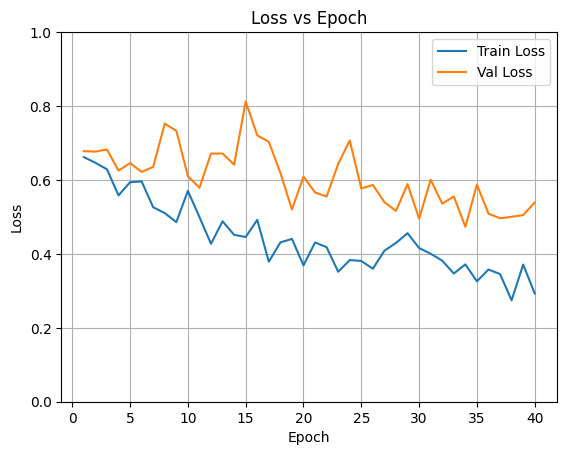

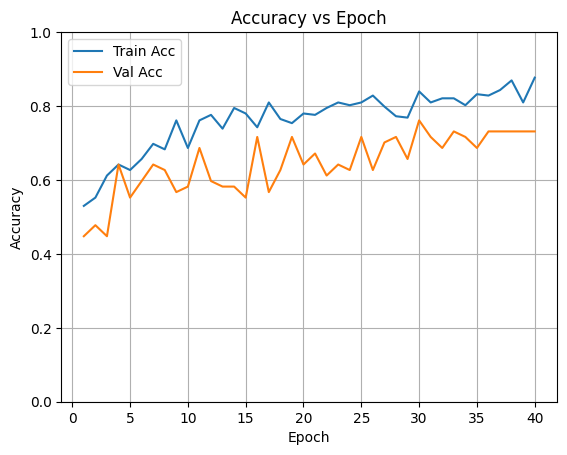

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = REAL, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bqwwkjlmgv.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Pr

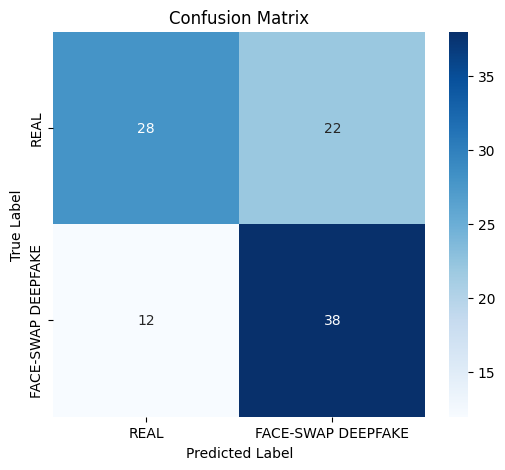


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.70      0.56      0.62        50
FACE-SWAP DEEPFAKE       0.63      0.76      0.69        50

          accuracy                           0.66       100
         macro avg       0.67      0.66      0.66       100
      weighted avg       0.67      0.66      0.66       100


📈 AUC Score: 0.6888


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


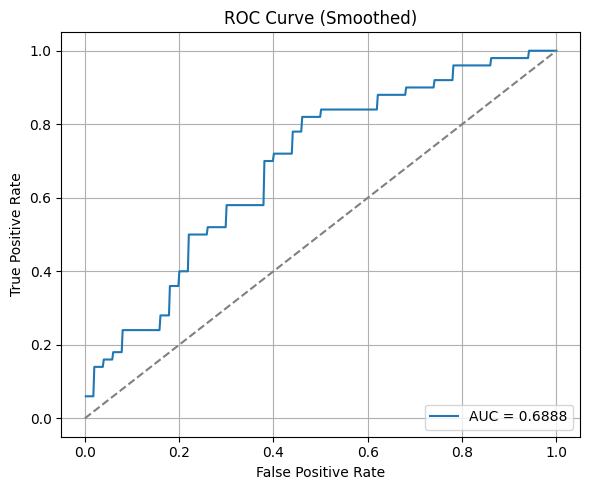

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_1_Wajah_2R1F.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Percobaan 26**

Full Sequential Block (512) + Additional Block (1024)

Coba Learning Rate 1e-4

3 BiLSTM

Weight Criterion 2:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        # Tambahkan blok baru (512 → 1024)
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(
                inplanes=1024,
                planes=1024,
                stride=1
            )
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.extra_block(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)      # (B*T, 1024)
        return x.view(batch_size, time_steps, -1)  # (B, T, 1024)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        # Tambah Layer BiLSTM
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm3 = nn.LSTM(hidden_size * 2, hidden_size,num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        attended = self.attention(x)
        return attended

# Model Fitur Gabungan
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

In [5]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
model.eval()

DeepfakeClassifier(
  (visual_extractor): ResNetFeatureExtractor(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (1): BasicBlock(
          (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=Fals

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_469592\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)


Epoch [1/40] Train Loss: 0.6630 | Train Acc: 0.5784 | Val Loss: 0.5598 | Val Acc: 0.7313
Epoch [2/40] Train Loss: 0.6150 | Train Acc: 0.6381 | Val Loss: 0.5202 | Val Acc: 0.7612
Epoch [3/40] Train Loss: 0.5719 | Train Acc: 0.7015 | Val Loss: 0.6186 | Val Acc: 0.6567
Epoch [4/40] Train Loss: 0.5867 | Train Acc: 0.7090 | Val Loss: 0.4427 | Val Acc: 0.7761
Epoch [5/40] Train Loss: 0.5466 | Train Acc: 0.7425 | Val Loss: 0.5088 | Val Acc: 0.7463
Epoch [6/40] Train Loss: 0.5121 | Train Acc: 0.7649 | Val Loss: 0.5215 | Val Acc: 0.7612
Epoch [7/40] Train Loss: 0.5339 | Train Acc: 0.7313 | Val Loss: 0.5371 | Val Acc: 0.7313
Epoch [8/40] Train Loss: 0.4948 | Train Acc: 0.7761 | Val Loss: 0.5254 | Val Acc: 0.7612
Epoch [9/40] Train Loss: 0.4551 | Train Acc: 0.8022 | Val Loss: 0.5341 | Val Acc: 0.7910
Epoch [10/40] Train Loss: 0.5458 | Train Acc: 0.7687 | Val Loss: 0.5349 | Val Acc: 0.7761
Epoch [11/40] Train Loss: 0.4596 | Train Acc: 0.7948 | Val Loss: 0.3864 | Val Acc: 0.8507
Epoch [12/40] Train

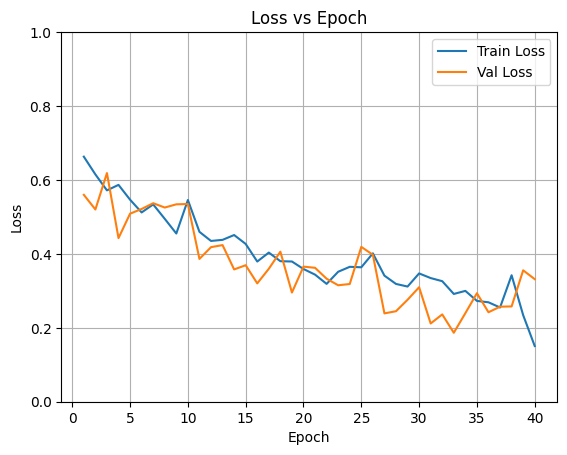

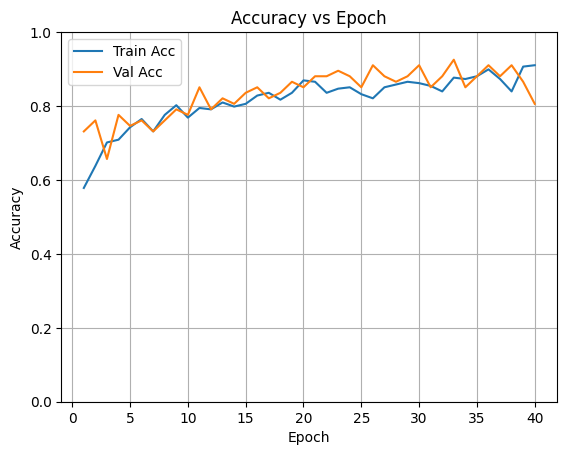

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = REAL, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bqwwkjlmgv.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = FACE-SWAP DEEPFAKE

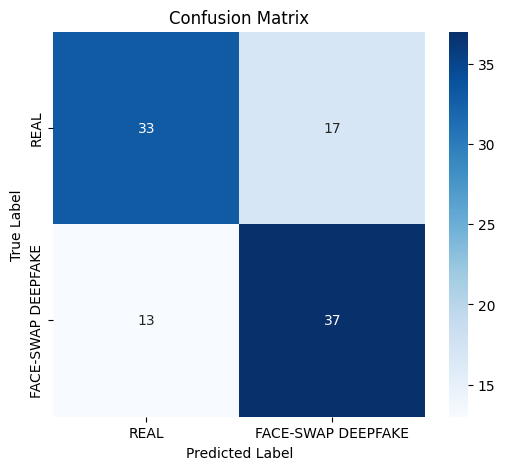


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.72      0.66      0.69        50
FACE-SWAP DEEPFAKE       0.69      0.74      0.71        50

          accuracy                           0.70       100
         macro avg       0.70      0.70      0.70       100
      weighted avg       0.70      0.70      0.70       100


📈 AUC Score: 0.7316


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


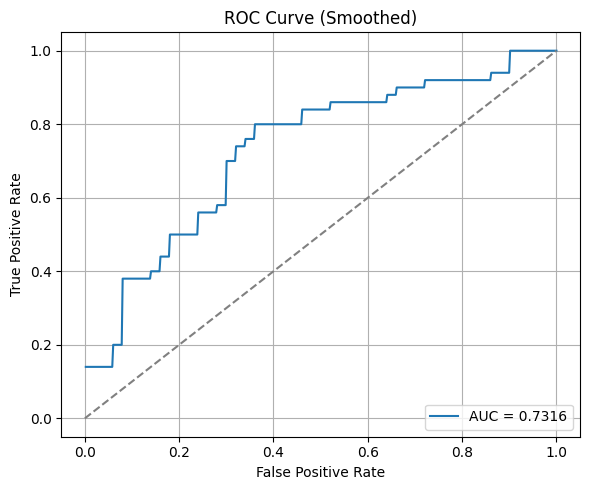

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)  # (1, T, 3, 224, 224)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

=========================================

**Testing Learning Rate**

=========================================

**Percobaan 15**

Full Sequential Block (512) + Additional Block (1024)

3 BiLSTM

Coba Learning Rate 10e-3

Weight Criterion 2:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        # Tambahkan blok baru (512 → 1024)
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(
                inplanes=1024,
                planes=1024,
                stride=1
            )
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.extra_block(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)      # (B*T, 1024)
        return x.view(batch_size, time_steps, -1)  # (B, T, 1024)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        # Tambah Layer BiLSTM
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm3 = nn.LSTM(hidden_size * 2, hidden_size,num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        attended = self.attention(x)
        return attended

# Model Fitur Gabungan
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

In [ ]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function (pergantian learning rate 0.001)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save best model dengan val loss terbaik
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_1R1F_LR10e-3.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_469592\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)


Epoch [1/40] Train Loss: 0.6997 | Train Acc: 0.5261 | Val Loss: 0.6467 | Val Acc: 0.5522
Epoch [2/40] Train Loss: 0.6883 | Train Acc: 0.5075 | Val Loss: 0.6245 | Val Acc: 0.5522
Epoch [3/40] Train Loss: 0.6662 | Train Acc: 0.4963 | Val Loss: 0.6420 | Val Acc: 0.5522
Epoch [4/40] Train Loss: 0.6771 | Train Acc: 0.4888 | Val Loss: 0.6207 | Val Acc: 0.5522
Epoch [5/40] Train Loss: 0.7076 | Train Acc: 0.4888 | Val Loss: 0.6329 | Val Acc: 0.5522
Epoch [6/40] Train Loss: 0.6649 | Train Acc: 0.5037 | Val Loss: 0.6408 | Val Acc: 0.5522
Epoch [7/40] Train Loss: 0.6666 | Train Acc: 0.4963 | Val Loss: 0.6492 | Val Acc: 0.5522
Epoch [8/40] Train Loss: 0.6768 | Train Acc: 0.4963 | Val Loss: 0.6462 | Val Acc: 0.5522
Epoch [9/40] Train Loss: 0.6782 | Train Acc: 0.4963 | Val Loss: 0.6602 | Val Acc: 0.5522
Epoch [10/40] Train Loss: 0.6795 | Train Acc: 0.4851 | Val Loss: 0.6594 | Val Acc: 0.5522
Epoch [11/40] Train Loss: 0.6618 | Train Acc: 0.4963 | Val Loss: 0.6253 | Val Acc: 0.5522
Epoch [12/40] Train

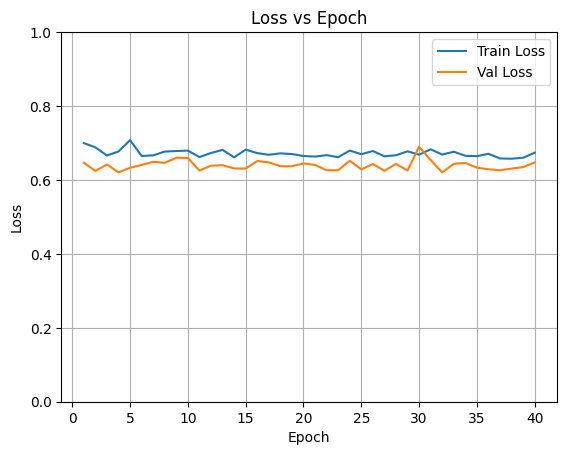

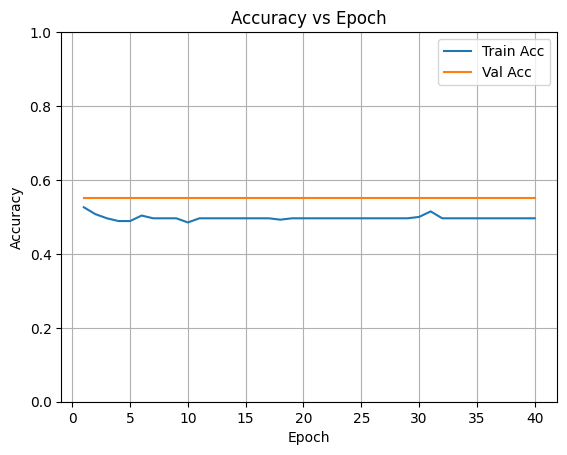

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = REAL, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = REAL, True = REAL
bqwwkjlmgv.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = REAL, True = REAL
chnbexdyhq.pt: Predicted = REAL, True = REAL
cmbloezomc.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
cuewtjauyi.pt: Predict

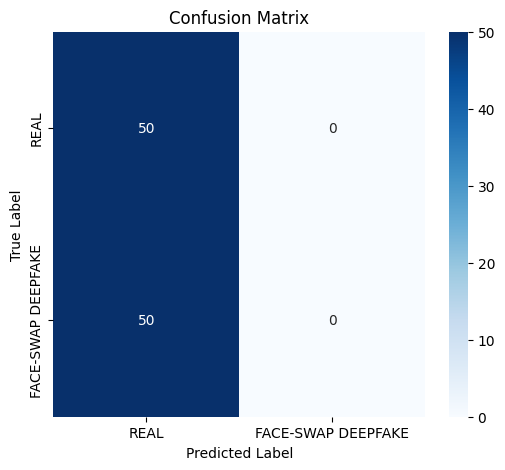


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.50      1.00      0.67        50
FACE-SWAP DEEPFAKE       0.00      0.00      0.00        50

          accuracy                           0.50       100
         macro avg       0.25      0.50      0.33       100
      weighted avg       0.25      0.50      0.33       100


📈 AUC Score: 0.6130


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

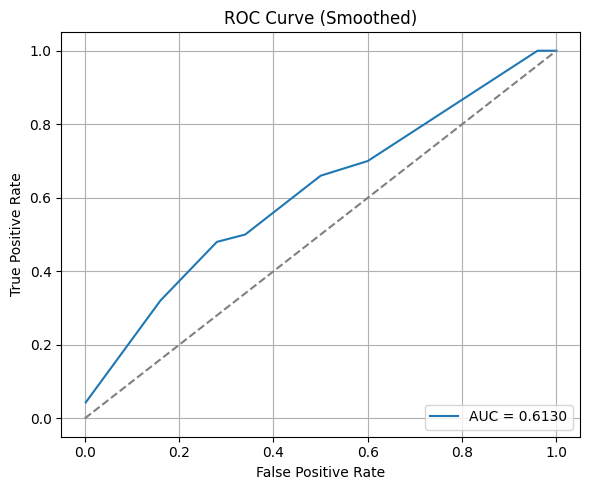

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_LR10e-3.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Percobaan 16**

Full Sequential Block (512) + Additional Block (1024)

Coba Learning Rate 1e-5

Weight Criterion 2:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        # Tambahkan blok baru (512 → 1024)
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(
                inplanes=1024,
                planes=1024,
                stride=1
            )
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.extra_block(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)      # (B*T, 1024)
        return x.view(batch_size, time_steps, -1)  # (B, T, 1024)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        # Tambah Layer BiLSTM
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm3 = nn.LSTM(hidden_size * 2, hidden_size,num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        attended = self.attention(x)
        return attended

# Model Fitur Gabungan
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

In [ ]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function (pergantian learning rate 0.00001)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_LR10e-5.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_469592\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)


Epoch [1/40] Train Loss: 0.5825 | Train Acc: 0.6381 | Val Loss: 0.4487 | Val Acc: 0.7612
Epoch [2/40] Train Loss: 0.5059 | Train Acc: 0.7500 | Val Loss: 0.3952 | Val Acc: 0.8358
Epoch [3/40] Train Loss: 0.4422 | Train Acc: 0.7836 | Val Loss: 0.3858 | Val Acc: 0.7910
Epoch [4/40] Train Loss: 0.4049 | Train Acc: 0.8097 | Val Loss: 0.3094 | Val Acc: 0.8657
Epoch [5/40] Train Loss: 0.3872 | Train Acc: 0.8358 | Val Loss: 0.3123 | Val Acc: 0.8507
Epoch [6/40] Train Loss: 0.4035 | Train Acc: 0.8060 | Val Loss: 0.2966 | Val Acc: 0.8806
Epoch [7/40] Train Loss: 0.3989 | Train Acc: 0.8134 | Val Loss: 0.3871 | Val Acc: 0.8507
Epoch [8/40] Train Loss: 0.3160 | Train Acc: 0.8731 | Val Loss: 0.3541 | Val Acc: 0.8507
Epoch [9/40] Train Loss: 0.3036 | Train Acc: 0.8769 | Val Loss: 0.3505 | Val Acc: 0.8507
Epoch [10/40] Train Loss: 0.3208 | Train Acc: 0.8396 | Val Loss: 0.4613 | Val Acc: 0.8209
Epoch [11/40] Train Loss: 0.2901 | Train Acc: 0.8582 | Val Loss: 0.3170 | Val Acc: 0.8657
Epoch [12/40] Train

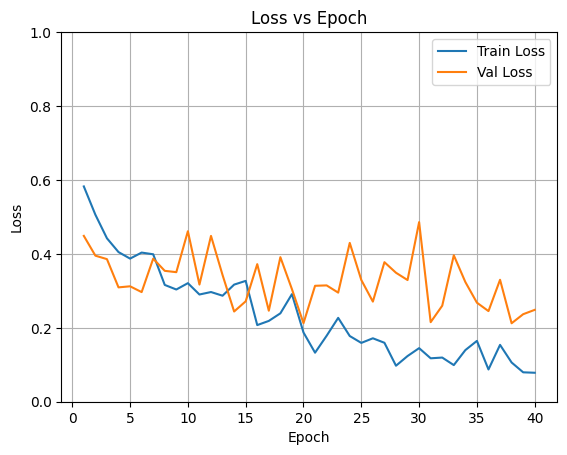

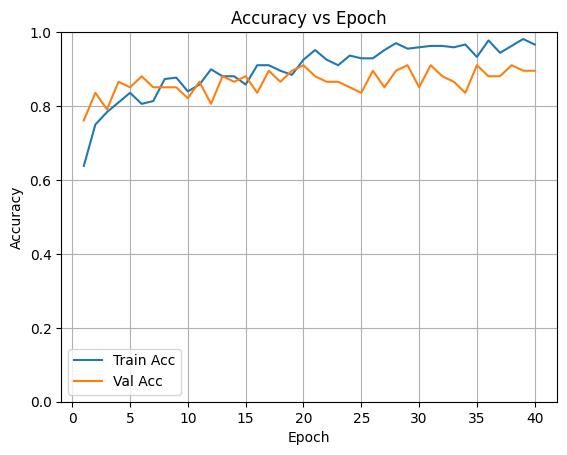

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bqwwkjlmgv.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWA

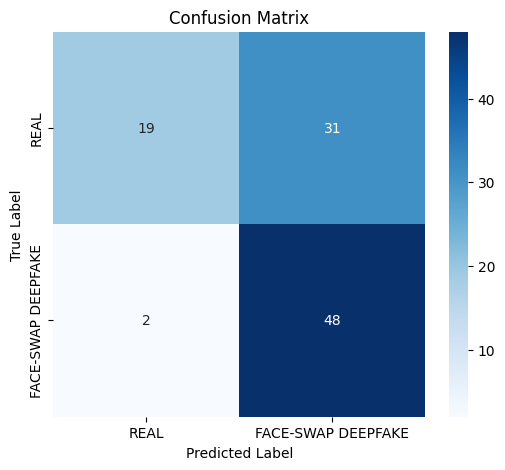


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.90      0.38      0.54        50
FACE-SWAP DEEPFAKE       0.61      0.96      0.74        50

          accuracy                           0.67       100
         macro avg       0.76      0.67      0.64       100
      weighted avg       0.76      0.67      0.64       100


📈 AUC Score: 0.7048


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


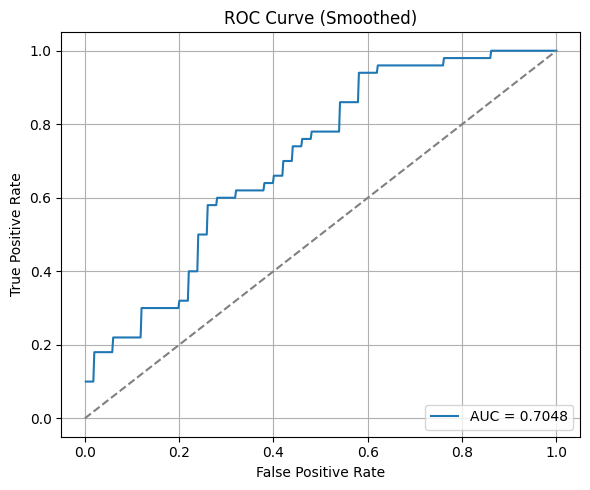

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_LR10e-5.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Percobaan 23**

Full Sequential Block (512) + Additional Block (1024)

3 BiLSTM

Coba Learning Rate 1e-2

Weight Criterion 2:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        # Tambahkan blok baru (512 → 1024)
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(
                inplanes=1024,
                planes=1024,
                stride=1
            )
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.extra_block(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)      # (B*T, 1024)
        return x.view(batch_size, time_steps, -1)  # (B, T, 1024)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        # Tambah Layer BiLSTM
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm3 = nn.LSTM(hidden_size * 2, hidden_size,num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        attended = self.attention(x)
        return attended

# Model Fitur Gabungan
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

In [ ]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function (pergantian learning rate 0.01)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save Model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_LR10e-2.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_469592\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)


Epoch [1/40] Train Loss: 0.7585 | Train Acc: 0.5149 | Val Loss: 0.6390 | Val Acc: 0.5522
Epoch [2/40] Train Loss: 0.7107 | Train Acc: 0.5187 | Val Loss: 0.6384 | Val Acc: 0.5522
Epoch [3/40] Train Loss: 0.6985 | Train Acc: 0.5187 | Val Loss: 0.6320 | Val Acc: 0.5522
Epoch [4/40] Train Loss: 0.6790 | Train Acc: 0.4925 | Val Loss: 0.6421 | Val Acc: 0.5522
Epoch [5/40] Train Loss: 0.6692 | Train Acc: 0.4963 | Val Loss: 0.6364 | Val Acc: 0.5522
Epoch [6/40] Train Loss: 0.6588 | Train Acc: 0.4776 | Val Loss: 0.6788 | Val Acc: 0.5522
Epoch [7/40] Train Loss: 0.6759 | Train Acc: 0.4963 | Val Loss: 0.6336 | Val Acc: 0.5522
Epoch [8/40] Train Loss: 0.6833 | Train Acc: 0.4963 | Val Loss: 0.6648 | Val Acc: 0.5522
Epoch [9/40] Train Loss: 0.6827 | Train Acc: 0.4963 | Val Loss: 0.6332 | Val Acc: 0.5522
Epoch [10/40] Train Loss: 0.6638 | Train Acc: 0.4963 | Val Loss: 0.6423 | Val Acc: 0.5522
Epoch [11/40] Train Loss: 0.6720 | Train Acc: 0.4963 | Val Loss: 0.6357 | Val Acc: 0.5522
Epoch [12/40] Train

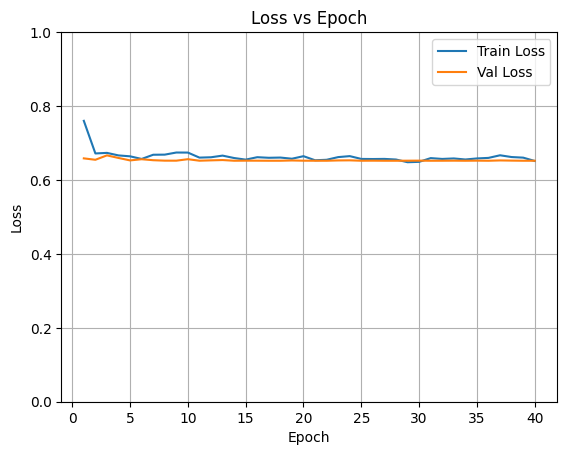

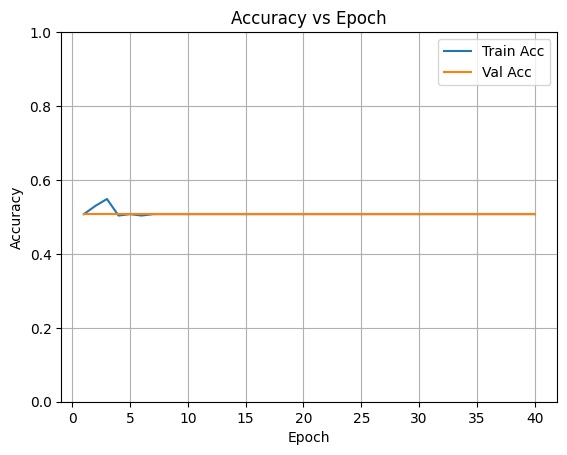

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = REAL, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = REAL, True = REAL
bqwwkjlmgv.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = REAL, True = REAL
chnbexdyhq.pt: Predicted = REAL, True = REAL
cmbloezomc.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
cuewtjauyi.pt: Predict

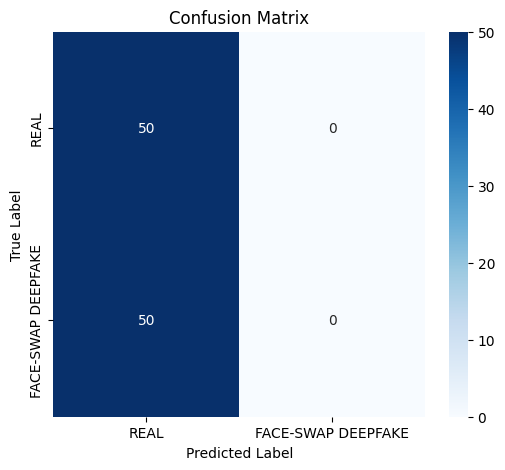


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.50      1.00      0.67        50
FACE-SWAP DEEPFAKE       0.00      0.00      0.00        50

          accuracy                           0.50       100
         macro avg       0.25      0.50      0.33       100
      weighted avg       0.25      0.50      0.33       100


📈 AUC Score: 0.5000


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

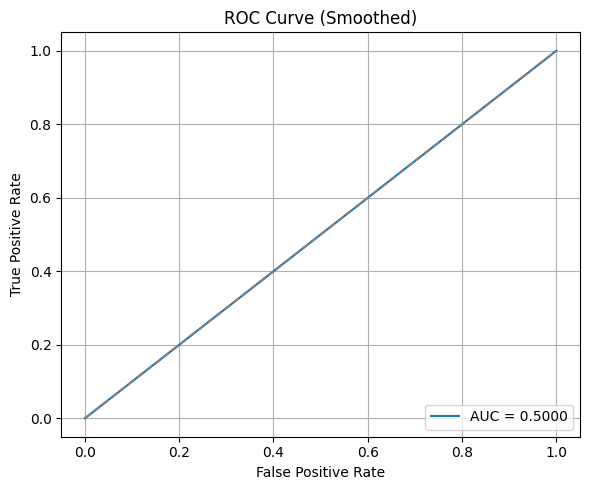

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_LR10e-2.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Percobaan 24**

Full Sequential Block (512) + Additional Block (1024)

3 BiLSTM

Coba Learning Rate 1e-1

Weight Criterion 2:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        # Tambahkan blok baru (512 → 1024)
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(
                inplanes=1024,
                planes=1024,
                stride=1
            )
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.extra_block(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)      # (B*T, 1024)
        return x.view(batch_size, time_steps, -1)  # (B, T, 1024)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        # Tambah Layer BiLSTM
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm3 = nn.LSTM(hidden_size * 2, hidden_size,num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        attended = self.attention(x)
        return attended

# Model Fitur Gabungan
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

In [ ]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function (pergantian learning rate 0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_LR10e-1.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_469592\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)


Epoch [1/40] Train Loss: 0.9751 | Train Acc: 0.5149 | Val Loss: 0.6240 | Val Acc: 0.5522
Epoch [2/40] Train Loss: 0.6802 | Train Acc: 0.5187 | Val Loss: 0.6483 | Val Acc: 0.5522
Epoch [3/40] Train Loss: 0.6945 | Train Acc: 0.4590 | Val Loss: 0.6248 | Val Acc: 0.5522
Epoch [4/40] Train Loss: 0.6701 | Train Acc: 0.4888 | Val Loss: 0.6320 | Val Acc: 0.5522
Epoch [5/40] Train Loss: 0.6719 | Train Acc: 0.4963 | Val Loss: 0.6559 | Val Acc: 0.5522
Epoch [6/40] Train Loss: 0.6800 | Train Acc: 0.4813 | Val Loss: 0.6884 | Val Acc: 0.5522
Epoch [7/40] Train Loss: 0.6610 | Train Acc: 0.4888 | Val Loss: 0.6216 | Val Acc: 0.5522
Epoch [8/40] Train Loss: 0.6867 | Train Acc: 0.5112 | Val Loss: 0.6132 | Val Acc: 0.5522
Epoch [9/40] Train Loss: 0.6766 | Train Acc: 0.4963 | Val Loss: 0.6371 | Val Acc: 0.5522
Epoch [10/40] Train Loss: 0.6701 | Train Acc: 0.4963 | Val Loss: 0.6573 | Val Acc: 0.5522
Epoch [11/40] Train Loss: 0.6713 | Train Acc: 0.4963 | Val Loss: 0.6367 | Val Acc: 0.5522
Epoch [12/40] Train

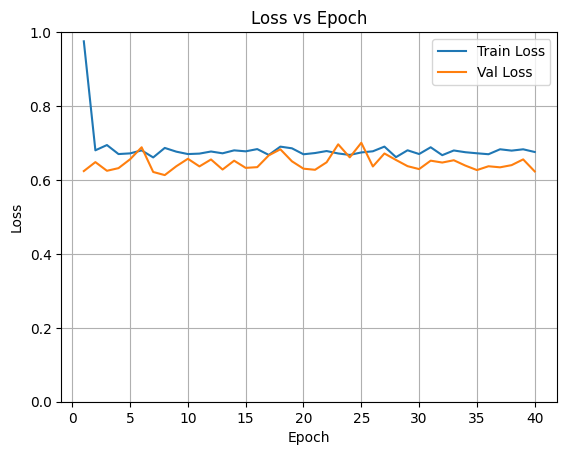

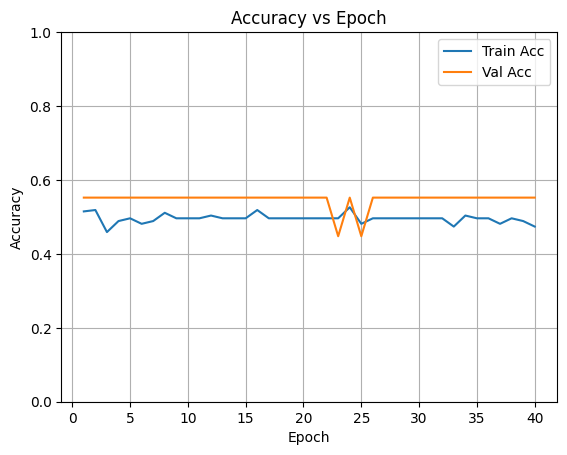

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = REAL, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = REAL, True = REAL
bqwwkjlmgv.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = REAL, True = REAL
chnbexdyhq.pt: Predicted = REAL, True = REAL
cmbloezomc.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
cuewtjauyi.pt: Predict

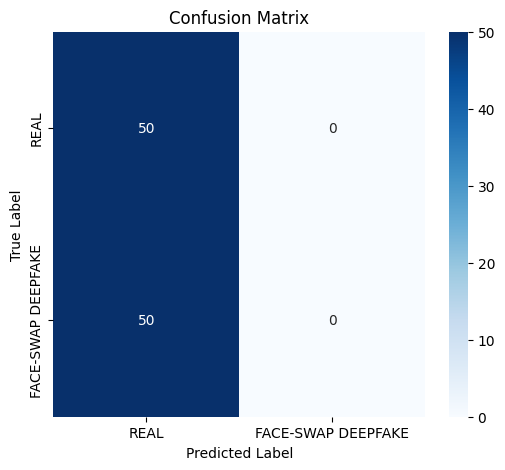


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.50      1.00      0.67        50
FACE-SWAP DEEPFAKE       0.00      0.00      0.00        50

          accuracy                           0.50       100
         macro avg       0.25      0.50      0.33       100
      weighted avg       0.25      0.50      0.33       100


📈 AUC Score: 0.5000


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

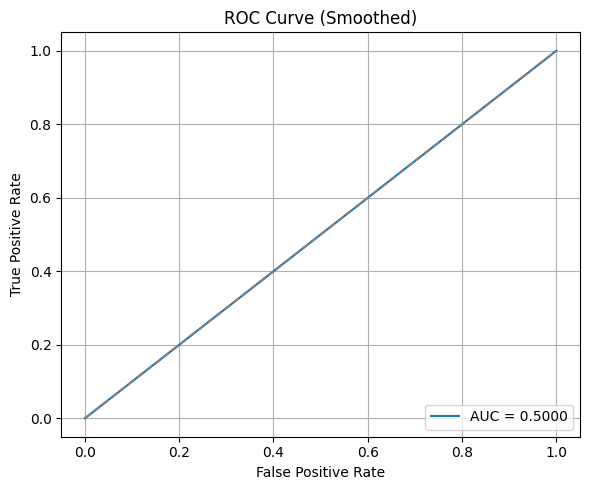

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_LR10e-1.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

=========================================

**Testing Freeze Layer**

=========================================

**Percobaan 14**

Full Sequential Block (1024)

3 BiLSTM

No Freeze

Weight Criterion 2:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        # Tambahkan blok baru (512 → 1024)
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(
                inplanes=1024,
                planes=1024,
                stride=1
            )
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.extra_block(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return x.view(batch_size, time_steps, -1)  # (B, T, 1024)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1) 
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)  # (B, F)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm3 = nn.LSTM(hidden_size * 2, hidden_size,num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x): 
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        attended = self.attention(x)
        return attended

# Model Gabungan Fitur
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

In [ ]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# tidak di freeze
model = DeepfakeClassifier(freeze_resnet = False).to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model dengan val loss terbaik
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_NoFreeze.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_469592\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)


Epoch [1/40] Train Loss: 0.6634 | Train Acc: 0.5597 | Val Loss: 0.5516 | Val Acc: 0.6866
Epoch [2/40] Train Loss: 0.6065 | Train Acc: 0.6455 | Val Loss: 0.6585 | Val Acc: 0.6269
Epoch [3/40] Train Loss: 0.6306 | Train Acc: 0.6082 | Val Loss: 0.5349 | Val Acc: 0.6866
Epoch [4/40] Train Loss: 0.5857 | Train Acc: 0.7015 | Val Loss: 0.5531 | Val Acc: 0.7313
Epoch [5/40] Train Loss: 0.5861 | Train Acc: 0.6866 | Val Loss: 0.5701 | Val Acc: 0.5522
Epoch [6/40] Train Loss: 0.5727 | Train Acc: 0.6754 | Val Loss: 0.5222 | Val Acc: 0.7612
Epoch [7/40] Train Loss: 0.5749 | Train Acc: 0.7127 | Val Loss: 0.5522 | Val Acc: 0.7761
Epoch [8/40] Train Loss: 0.5194 | Train Acc: 0.7687 | Val Loss: 0.4749 | Val Acc: 0.7463
Epoch [9/40] Train Loss: 0.5154 | Train Acc: 0.7649 | Val Loss: 0.5097 | Val Acc: 0.7463
Epoch [10/40] Train Loss: 0.5370 | Train Acc: 0.7575 | Val Loss: 0.3501 | Val Acc: 0.8955
Epoch [11/40] Train Loss: 0.4579 | Train Acc: 0.8060 | Val Loss: 0.3916 | Val Acc: 0.8060
Epoch [12/40] Train

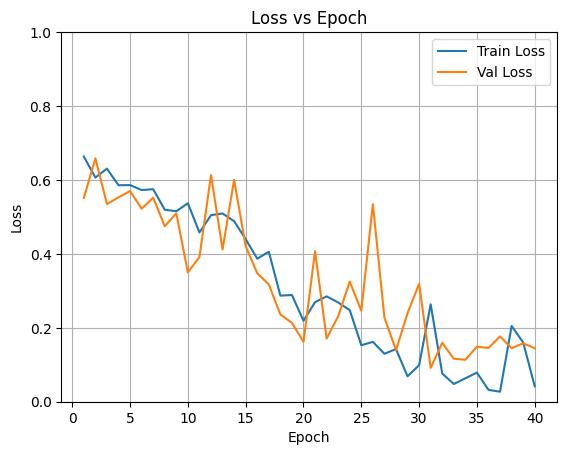

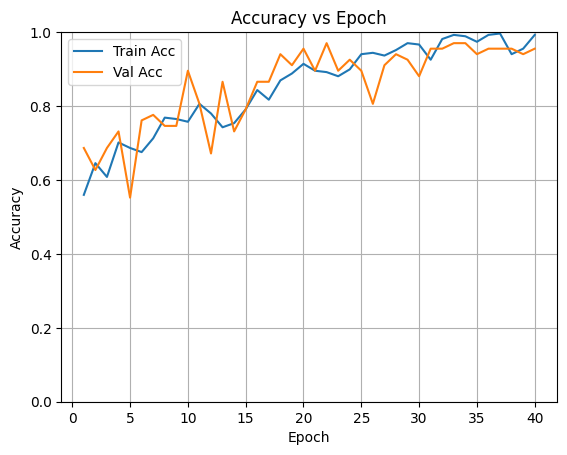

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bfkzrgovsv.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bfljjbavig.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bqwwkjlmgv.pt: Predicted = FACE-SW

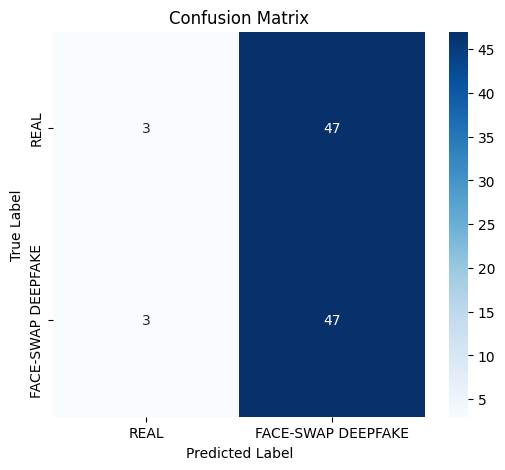


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.50      0.06      0.11        50
FACE-SWAP DEEPFAKE       0.50      0.94      0.65        50

          accuracy                           0.50       100
         macro avg       0.50      0.50      0.38       100
      weighted avg       0.50      0.50      0.38       100


📈 AUC Score: 0.5540


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


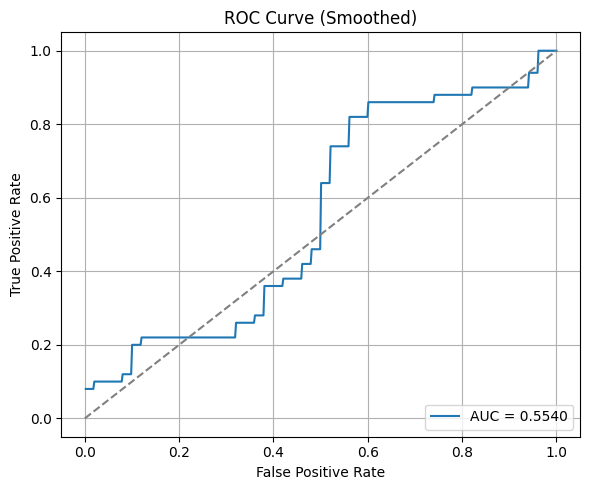

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_NoFreeze.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)  # (1, T, 3, 224, 224)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])  # Simpan prob kelas 1 (DEEPFAKE)

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Percobaan 10**

Full Sequential Block (512) + Additional Block (1024)

3 BiLSTM

Half Freeze

Weight Criterion 2:1

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            # Freeze sebagian layer
            for idx, layer in enumerate(resnet.children()):
                if idx <= 5:  # Freeze sampai layer ke-5
                    for param in layer.parameters():
                        param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        # Tambahkan blok baru (512 → 1024)
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(
                inplanes=1024,
                planes=1024,
                stride=1
            )
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.extra_block(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return x.view(batch_size, time_steps, -1)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm3 = nn.LSTM(hidden_size * 2, hidden_size,num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        attended = self.attention(x)
        return attended

# Model Gabungan Fitur
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

In [ ]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_HalfFreeze.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

C:\Users\krist\AppData\Local\Temp\ipykernel_46628\292321542.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.stack(data['frames']), torch.tensor(data['label'], dtype=torch.long)
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch [1/40] Train Loss: 0.6637 | Train Acc: 0.5709 | Val Loss: 0.4522 | Val Acc: 0.7910
Epoch [2/40] Train Loss: 0.5540 | Train Acc: 0.6604 | Val Loss: 0.5904 | Val Acc: 0.7164
Epoch [3/40] Train Loss: 0.5284 | Train Acc: 0.7463 | Val Loss: 0.6630 | Val Acc: 0.7313
Epoch [4/40] Train Loss: 0.4718 | Train Acc: 0.7985 | Val Loss: 0.5016 | Val Acc: 0.7015
Epoch [5/40] Train Loss: 0.4428 | Train Acc: 0.8396 | Val Loss: 0.4655 | Val Acc: 0.7761
Epoch [6/40] Train Loss: 0.3998 | Train Acc: 0.8358 | Val Loss: 0.3917 | Val Acc: 0.8507
Epoch [7/40] Train Loss: 0.3333 | Train Acc: 0.8731 | Val Loss: 0.4029 | Val Acc: 0.8507
Epoch [8/40] Train Loss: 0.3383 | Train Acc: 0.8694 | Val Loss: 0.3578 | Val Acc: 0.8806
Epoch [9/40] Train Loss: 0.2477 | Train Acc: 0.9067 | Val Loss: 0.3905 | Val Acc: 0.8955
Epoch [10/40] Train Loss: 0.2767 | Train Acc: 0.8955 | Val Loss: 0.3053 | Val Acc: 0.8806
Epoch [11/40] Train Loss: 0.1852 | Train Acc: 0.9291 | Val Loss: 0.2300 | Val Acc: 0.9254
Epoch [12/40] Train

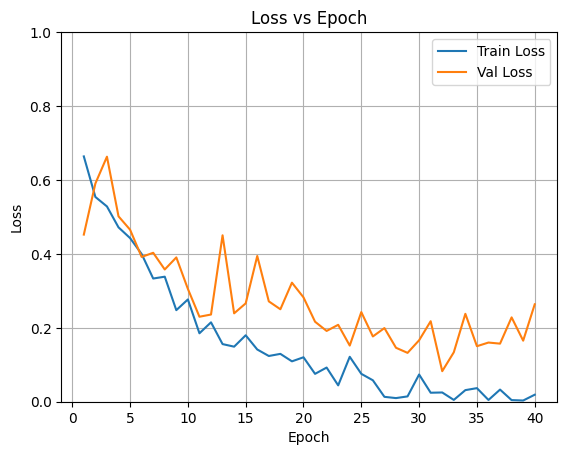

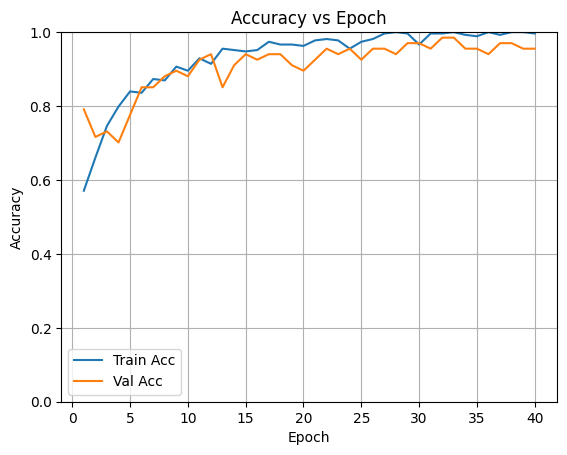

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


aabyjxwqyo.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bqwwkjlmgv.pt: Predicted = FACE-SWAP DEEPFAKE, T

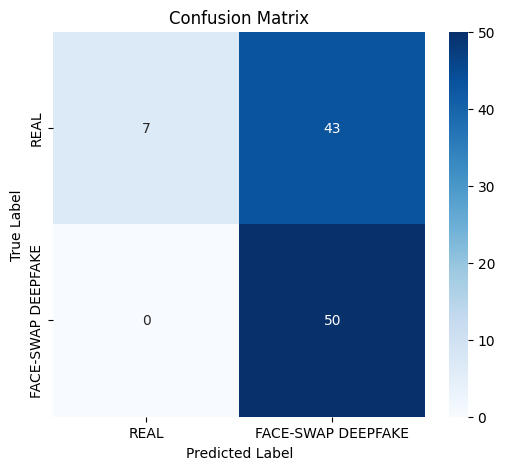


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       1.00      0.14      0.25        50
FACE-SWAP DEEPFAKE       0.54      1.00      0.70        50

          accuracy                           0.57       100
         macro avg       0.77      0.57      0.47       100
      weighted avg       0.77      0.57      0.47       100


📈 AUC Score: 0.6092


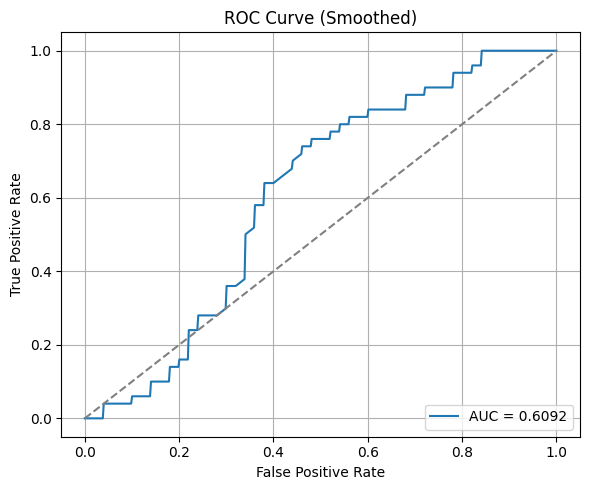

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_HalfFreeze.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

=========================================

**Coba Augmentasi Data**

=========================================

**Percobaan 27**

Full Sequential Block (512) + Additional Block (1024)

Coba Learning Rate 1e-4

3 BiLSTM

Weight Criterion 2:1

**Augmentasi**

In [ ]:
from torchvision import transforms
from PIL import Image
import random
from torch.utils.data import Dataset
import os
import torch

class ProcessedVideoDataset(Dataset):
    def __init__(self, pt_folder, augment=False):
        self.pt_folder = pt_folder
        self.file_list = sorted([
            f for f in os.listdir(pt_folder)
            if f.endswith('.pt')
        ])
        self.augment = augment

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        file_path = os.path.join(self.pt_folder, self.file_list[idx])
        data = torch.load(file_path)

        frames = data['frames']
        label = data['label']

        if self.augment:
            # Random augmentasi per video
            do_jitter = random.random() < 0.5
            do_hflip = random.random() < 0.5
            do_vflip = random.random() < 0.5

            color_jitter = transforms.ColorJitter(
                brightness=0.3,
                contrast=0.3,
                saturation=0.2,
                hue=0.05
            )

            augmented_frames = []
            for frame in frames:
                img = transforms.ToPILImage()(frame)

                # Apply kalau memenuhi threshold
                if do_jitter:
                    img = color_jitter(img)
                if do_hflip:
                    img = transforms.functional.hflip(img)
                if do_vflip:
                    img = transforms.functional.vflip(img)

                img = transforms.ToTensor()(img)
                augmented_frames.append(img)

            frames = torch.stack(augmented_frames)
        else:
            frames = torch.stack(frames)

        return frames, label

In [ ]:
from torch.utils.data import DataLoader, random_split

pt_folder = 'Dataset Deepfake Preprocessed/Preprocessed Wajah'
full_dataset = ProcessedVideoDataset(pt_folder, augment=True)

# Split 80/20
train_size = int(0.8 * len(full_dataset))
val_size = len(full_dataset) - train_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=4, shuffle=False, num_workers=0)

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        # Tambahkan blok baru (512 → 1024)
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(
                inplanes=1024,
                planes=1024,
                stride=1
            )
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.extra_block(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)      # (B*T, 1024)
        return x.view(batch_size, time_steps, -1)  # (B, T, 1024)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        # Tambah Layer BiLSTM
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm3 = nn.LSTM(hidden_size * 2, hidden_size,num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        attended = self.attention(x)
        return attended

# Model Fitur Gabungan
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

In [20]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/1024_ResNet18-BiLSTM_3_Wajah_2R1F_augmentasi.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

Epoch [1/40] Train Loss: 0.6443 | Train Acc: 0.6007 | Val Loss: 0.6287 | Val Acc: 0.6567
Epoch [2/40] Train Loss: 0.6336 | Train Acc: 0.6306 | Val Loss: 0.6665 | Val Acc: 0.4776
Epoch [3/40] Train Loss: 0.6401 | Train Acc: 0.6231 | Val Loss: 0.5716 | Val Acc: 0.6567
Epoch [4/40] Train Loss: 0.6657 | Train Acc: 0.5485 | Val Loss: 0.6347 | Val Acc: 0.5821
Epoch [5/40] Train Loss: 0.5723 | Train Acc: 0.6455 | Val Loss: 0.5674 | Val Acc: 0.6716
Epoch [6/40] Train Loss: 0.5682 | Train Acc: 0.6604 | Val Loss: 0.5261 | Val Acc: 0.7015
Epoch [7/40] Train Loss: 0.5584 | Train Acc: 0.6679 | Val Loss: 0.5331 | Val Acc: 0.6866
Epoch [8/40] Train Loss: 0.5570 | Train Acc: 0.6940 | Val Loss: 0.5232 | Val Acc: 0.7463
Epoch [9/40] Train Loss: 0.5107 | Train Acc: 0.7090 | Val Loss: 0.5737 | Val Acc: 0.6567
Epoch [10/40] Train Loss: 0.5336 | Train Acc: 0.7351 | Val Loss: 0.5239 | Val Acc: 0.7015
Epoch [11/40] Train Loss: 0.5577 | Train Acc: 0.6940 | Val Loss: 0.4878 | Val Acc: 0.7164
Epoch [12/40] Train

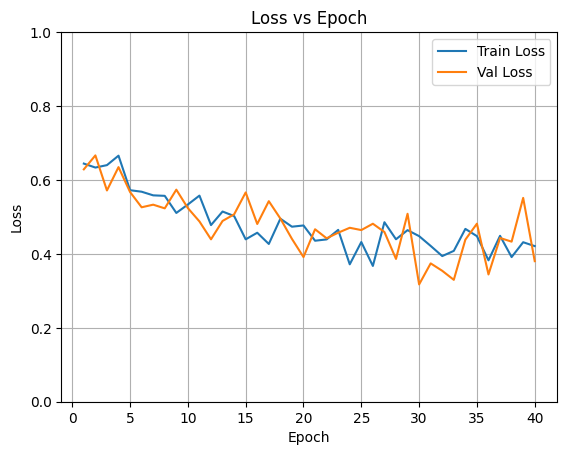

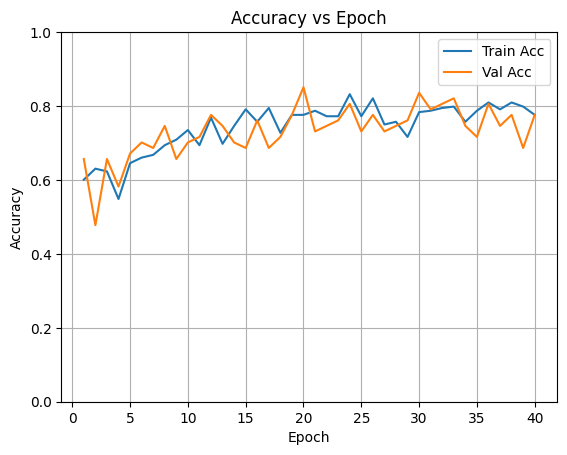

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = REAL, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bqwwkjlmgv.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = FACE-SWAP DEEPFAKE

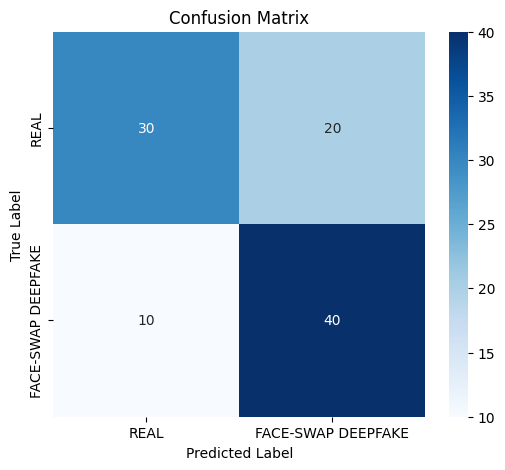


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.75      0.60      0.67        50
FACE-SWAP DEEPFAKE       0.67      0.80      0.73        50

          accuracy                           0.70       100
         macro avg       0.71      0.70      0.70       100
      weighted avg       0.71      0.70      0.70       100


📈 AUC Score: 0.6996


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


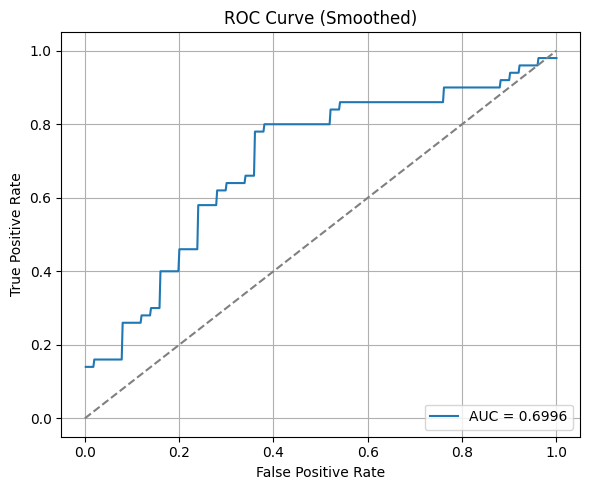

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/1024_ResNet18-BiLSTM_3_Wajah_2R1F_augmentasi.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

=========================================

**Coba GrayScale 20 FPS**

=========================================

**Coba 20 FPS Dalam GrayScale**

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True, grayscale=False):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)

        if grayscale:
            # Ubah conv1 agar menerima input 1 channel
            conv1 = resnet.conv1
            resnet.conv1 = nn.Conv2d(
                in_channels=1,
                out_channels=conv1.out_channels,
                kernel_size=conv1.kernel_size,
                stride=conv1.stride,
                padding=conv1.padding,
                bias=conv1.bias is not None
            )
            # Inisialisasi bobot baru dari rata-rata RGB
            with torch.no_grad():
                resnet.conv1.weight[:] = conv1.weight.mean(dim=1, keepdim=True)

        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False

        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(inplanes=1024, planes=1024, stride=1)
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.extra_block(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return x.view(batch_size, time_steps, -1)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm3 = nn.LSTM(hidden_size * 2, hidden_size,num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        attended = self.attention(x)
        return attended

class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True, grayscale=False):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet, grayscale=grayscale)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier(grayscale=True).to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/1024_ResNet18-BiLSTM_3_Wajah_2R1F_20FPS_GrayScale.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch [1/40] Train Loss: 0.6595 | Train Acc: 0.5417 | Val Loss: 0.6288 | Val Acc: 0.6866
Epoch [2/40] Train Loss: 0.6150 | Train Acc: 0.6023 | Val Loss: 0.6255 | Val Acc: 0.6716
Epoch [3/40] Train Loss: 0.5577 | Train Acc: 0.6742 | Val Loss: 0.5195 | Val Acc: 0.7761
Epoch [4/40] Train Loss: 0.5284 | Train Acc: 0.7159 | Val Loss: 0.6513 | Val Acc: 0.5522
Epoch [5/40] Train Loss: 0.5155 | Train Acc: 0.7462 | Val Loss: 0.6006 | Val Acc: 0.6418
Epoch [6/40] Train Loss: 0.4830 | Train Acc: 0.7765 | Val Loss: 0.4909 | Val Acc: 0.7313
Epoch [7/40] Train Loss: 0.5308 | Train Acc: 0.7235 | Val Loss: 0.4765 | Val Acc: 0.7313
Epoch [8/40] Train Loss: 0.4171 | Train Acc: 0.7992 | Val Loss: 0.7998 | Val Acc: 0.6716
Epoch [9/40] Train Loss: 0.3870 | Train Acc: 0.8333 | Val Loss: 0.4311 | Val Acc: 0.7910
Epoch [10/40] Train Loss: 0.3985 | Train Acc: 0.8144 | Val Loss: 0.3748 | Val Acc: 0.8209
Epoch [11/40] Train Loss: 0.3598 | Train Acc: 0.8485 | Val Loss: 0.5596 | Val Acc: 0.7612
Epoch [12/40] Train

In [6]:
print(best_val_loss)

0.2641636359491455


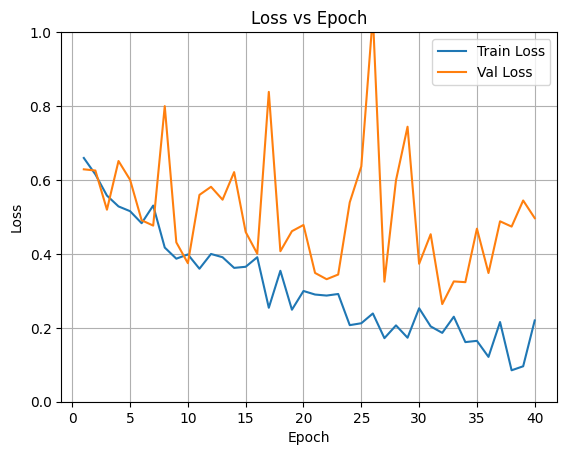

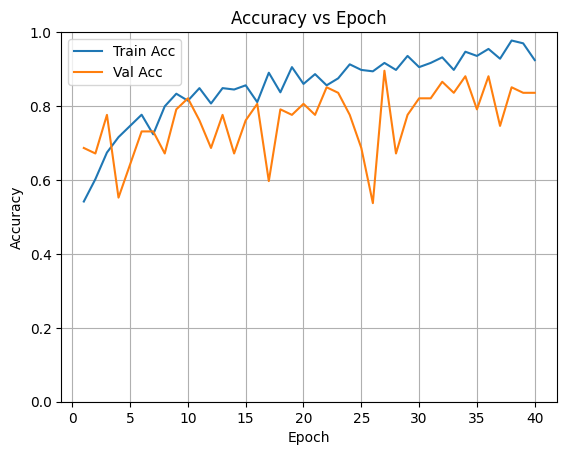

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\nati

aabyjxwqyo.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bqwwkjlmgv.pt: Predicted = REAL, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
chnbexdyhq.pt: Predicted = REAL, True = REAL
cmbloezomc.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
cuewtjauyi.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-

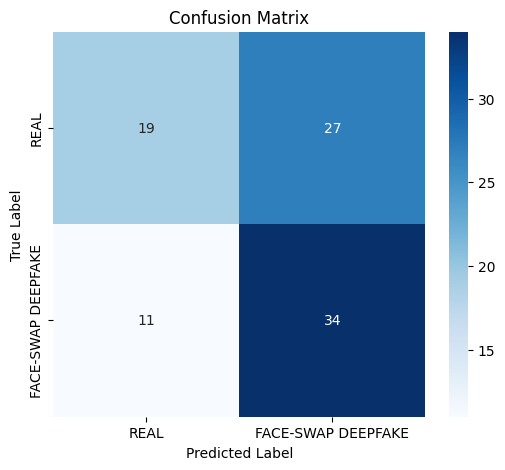


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.63      0.41      0.50        46
FACE-SWAP DEEPFAKE       0.56      0.76      0.64        45

          accuracy                           0.58        91
         macro avg       0.60      0.58      0.57        91
      weighted avg       0.60      0.58      0.57        91


📈 AUC Score: 0.6990


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


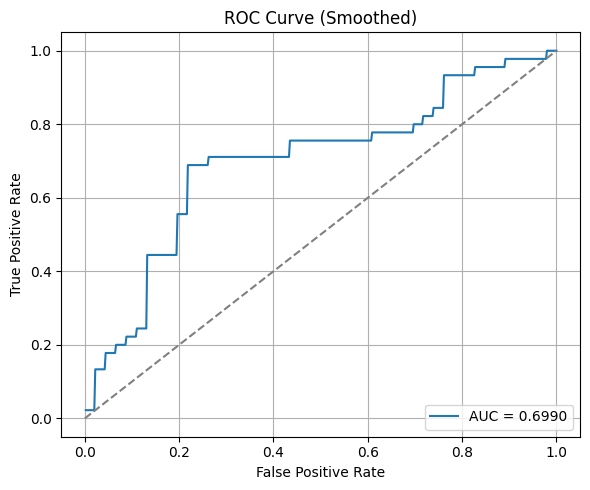

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier(grayscale=True)
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/1024_ResNet18-BiLSTM_3_Wajah_2R1F_20FPS_GrayScale.pth"
pt_folder = "Dataset_Skripsi/20_Frames_per_Second_Preprocessed_Visual_Wajah_GrayScale_Testing"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

**Coba GrayScale tapi * 3 channel**

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        # Tambahkan blok baru (512 → 1024)
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(
                inplanes=1024,
                planes=1024,
                stride=1
            )
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.extra_block(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)
        return x.view(batch_size, time_steps, -1)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1) 
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm3 = nn.LSTM(hidden_size * 2, hidden_size,num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        attended = self.attention(x)
        return attended

# Model Gabungan Fitur
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

In [7]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

In [ ]:
num_epochs = 40
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/1024_ResNet18-BiLSTM_3_Wajah_2R1F_20FPS_GrayScale3Channel.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch [1/40] Train Loss: 0.6459 | Train Acc: 0.5758 | Val Loss: 0.6848 | Val Acc: 0.6119
Epoch [2/40] Train Loss: 0.5632 | Train Acc: 0.7197 | Val Loss: 0.6203 | Val Acc: 0.6716
Epoch [3/40] Train Loss: 0.6067 | Train Acc: 0.6364 | Val Loss: 0.5582 | Val Acc: 0.7015
Epoch [4/40] Train Loss: 0.5126 | Train Acc: 0.7462 | Val Loss: 0.5057 | Val Acc: 0.7313
Epoch [5/40] Train Loss: 0.5206 | Train Acc: 0.7348 | Val Loss: 0.6587 | Val Acc: 0.6269
Epoch [6/40] Train Loss: 0.4962 | Train Acc: 0.7083 | Val Loss: 0.6481 | Val Acc: 0.6567
Epoch [7/40] Train Loss: 0.4807 | Train Acc: 0.7462 | Val Loss: 0.5041 | Val Acc: 0.7463
Epoch [8/40] Train Loss: 0.4771 | Train Acc: 0.7841 | Val Loss: 0.5579 | Val Acc: 0.6716
Epoch [9/40] Train Loss: 0.4349 | Train Acc: 0.7803 | Val Loss: 0.4548 | Val Acc: 0.6866
Epoch [10/40] Train Loss: 0.4265 | Train Acc: 0.7992 | Val Loss: 0.5631 | Val Acc: 0.6866
Epoch [11/40] Train Loss: 0.4651 | Train Acc: 0.7992 | Val Loss: 0.4412 | Val Acc: 0.7015
Epoch [12/40] Train

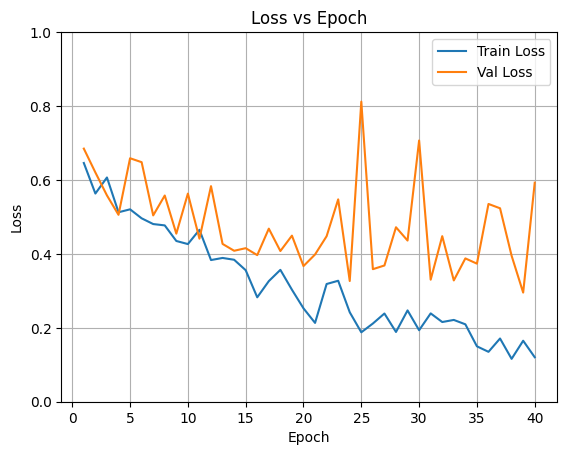

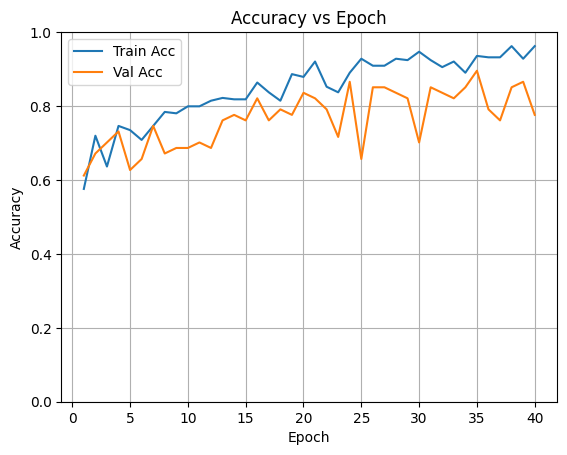

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\nati

aabyjxwqyo.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = REAL, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bqwwkjlmgv.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
chjatzdqcl.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
chnbexdyhq.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
cmbloezomc.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
cuewtjauyi.pt: Pr

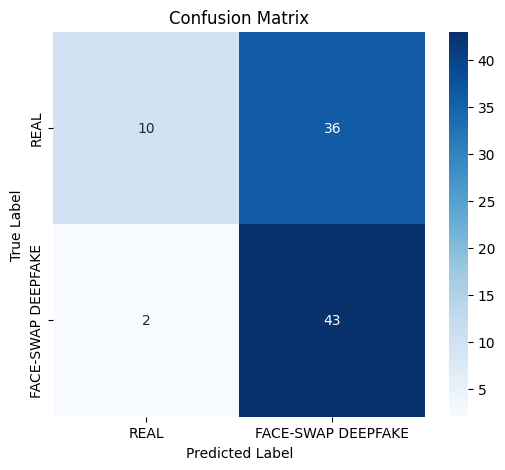


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.83      0.22      0.34        46
FACE-SWAP DEEPFAKE       0.54      0.96      0.69        45

          accuracy                           0.58        91
         macro avg       0.69      0.59      0.52        91
      weighted avg       0.69      0.58      0.52        91


📈 AUC Score: 0.7072


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


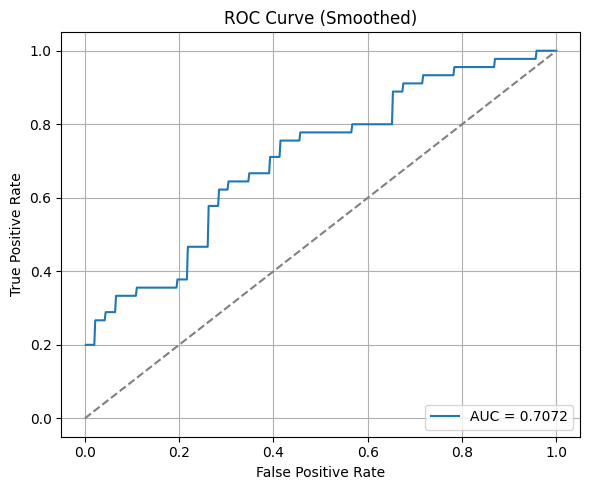

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/1024_ResNet18-BiLSTM_3_Wajah_2R1F_20FPS_GrayScale3Channel.pth"
pt_folder = "Dataset_Skripsi/20_Frames_per_Second_Preprocessed_Visual_Wajah_GrayScale_Testing"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames'])
    
    if frames.shape[1] == 1:
            # Ubah grayscale → RGB 3 channel (clone channel grayscale)
            frames = frames.repeat(1, 3, 1, 1)  # (T, 3, 224, 224)
    
    frames = frames.unsqueeze(0).to(device)  # (1, T, 3, 224, 224)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")

=========================================

**Coba Banyak Epoch**

=========================================

**COBA 100 EPOCH**

In [ ]:
import torch
import torch.nn as nn
from torchvision import models
import torch.nn.functional as F
from torchvision.models.resnet import BasicBlock

# Model Fitur Ekstraktor
class ResNetFeatureExtractor(nn.Module):
    def __init__(self, freeze=True):
        super(ResNetFeatureExtractor, self).__init__()
        resnet = models.resnet18(pretrained=True)
        if freeze:
            for param in resnet.parameters():
                param.requires_grad = False
        self.feature_extractor = nn.Sequential(*list(resnet.children())[:-2])
        # Tambahkan blok baru (512 → 1024)
        self.extra_block = nn.Sequential(
            BasicBlock(
                inplanes=512,
                planes=1024,
                stride=2,
                downsample=nn.Sequential(
                    nn.Conv2d(512, 1024, kernel_size=1, stride=2, bias=False),
                    nn.BatchNorm2d(1024)
                )
            ),
            BasicBlock(
                inplanes=1024,
                planes=1024,
                stride=1
            )
        )
        self.pool = nn.AdaptiveAvgPool2d((1, 1))

    def forward(self, x):
        batch_size, time_steps, C, H, W = x.shape
        x = x.view(batch_size * time_steps, C, H, W)
        x = self.feature_extractor(x)
        x = self.extra_block(x)
        x = self.pool(x)
        x = x.view(x.size(0), -1)      # (B*T, 1024)
        return x.view(batch_size, time_steps, -1)  # (B, T, 1024)

class AttentionLayer(nn.Module):
    def __init__(self, input_dim):
        super(AttentionLayer, self).__init__()
        self.attn = nn.Linear(input_dim, 1)

    def forward(self, x):
        weights = self.attn(x).squeeze(-1)
        weights = torch.softmax(weights, dim=1)
        attended = torch.sum(x * weights.unsqueeze(-1), dim=1)
        return attended

# Model Fitur Temporal
class BiLSTMDeepfake(nn.Module):
    def __init__(self, input_size=1024, hidden_size=256, num_layers=2, dropout=0.3):
        super(BiLSTMDeepfake, self).__init__()
        # Tambah Layer BiLSTM
        self.lstm1 = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm2 = nn.LSTM(hidden_size * 2, hidden_size, num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        self.lstm3 = nn.LSTM(hidden_size * 2, hidden_size,num_layers=num_layers, batch_first=True,
                             bidirectional=True, dropout=dropout)
        
        self.attention = AttentionLayer(hidden_size * 2)
        self.output_size = hidden_size * 2

    def forward(self, x):
        x, _ = self.lstm1(x)
        x, _ = self.lstm2(x)
        x, _ = self.lstm3(x)
        attended = self.attention(x)
        return attended

# Model Fitur Gabungan
class DeepfakeClassifier(nn.Module):
    def __init__(self, num_classes=2, freeze_resnet=True):
        super(DeepfakeClassifier, self).__init__()
        self.visual_extractor = ResNetFeatureExtractor(freeze=freeze_resnet)
        self.bilstm = BiLSTMDeepfake()
        input_dim = self.bilstm.output_size

        self.classifier = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LayerNorm(256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.LayerNorm(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, num_classes)
        )

    def forward(self, frames):
        visual_feat_seq = self.visual_extractor(frames)
        visual_embed = self.bilstm(visual_feat_seq)
        out = self.classifier(visual_embed)
        return out

In [6]:
# Inisialisasi perangkat dan model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DeepfakeClassifier().to(device)

# Optimizer dan loss function
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
weights = torch.tensor([2.0, 1.0], device=device)  # bobot kelas REAL, DEEPFAKE
criterion = nn.CrossEntropyLoss(weight=weights)

In [ ]:
# Tambah epoch
num_epochs = 100
best_val_loss = float('inf')

# Log
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    total_correct = 0
    total_samples = 0

    # Training
    for frames, labels in train_loader:
        frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(frames)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * frames.size(0)
        _, predicted = torch.max(outputs, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    train_acc = total_correct / total_samples
    train_loss = running_loss / total_samples

    # Validasi
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for frames, labels in val_loader:
            frames = torch.stack(frames).to(device) if isinstance(frames, list) else frames.to(device)
            labels = labels.to(device)

            outputs = model(frames)
            loss = criterion(outputs, labels)

            val_loss += loss.item() * frames.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)

    val_acc = val_correct / val_total
    val_loss = val_loss / val_total

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    
    # Save model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_100Epoch.pth')
    
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} "
          f"| Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ..\aten\src\ATen\native\cudnn\Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


Epoch [1/100] Train Loss: 0.6889 | Train Acc: 0.4851 | Val Loss: 0.6264 | Val Acc: 0.4925
Epoch [2/100] Train Loss: 0.5944 | Train Acc: 0.6493 | Val Loss: 0.6990 | Val Acc: 0.6119
Epoch [3/100] Train Loss: 0.6002 | Train Acc: 0.6530 | Val Loss: 0.5980 | Val Acc: 0.6716
Epoch [4/100] Train Loss: 0.5331 | Train Acc: 0.7463 | Val Loss: 0.5665 | Val Acc: 0.7313
Epoch [5/100] Train Loss: 0.5382 | Train Acc: 0.7649 | Val Loss: 0.7171 | Val Acc: 0.6269
Epoch [6/100] Train Loss: 0.5476 | Train Acc: 0.7201 | Val Loss: 0.5935 | Val Acc: 0.6418
Epoch [7/100] Train Loss: 0.4964 | Train Acc: 0.7425 | Val Loss: 0.5790 | Val Acc: 0.6716
Epoch [8/100] Train Loss: 0.4506 | Train Acc: 0.7910 | Val Loss: 0.5033 | Val Acc: 0.8209
Epoch [9/100] Train Loss: 0.4293 | Train Acc: 0.7575 | Val Loss: 0.4498 | Val Acc: 0.7910
Epoch [10/100] Train Loss: 0.4232 | Train Acc: 0.8060 | Val Loss: 0.4623 | Val Acc: 0.7612
Epoch [11/100] Train Loss: 0.3294 | Train Acc: 0.8545 | Val Loss: 0.4211 | Val Acc: 0.8060
Epoch [1

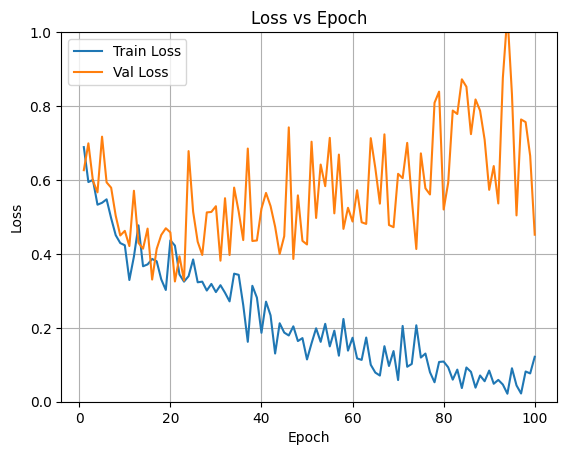

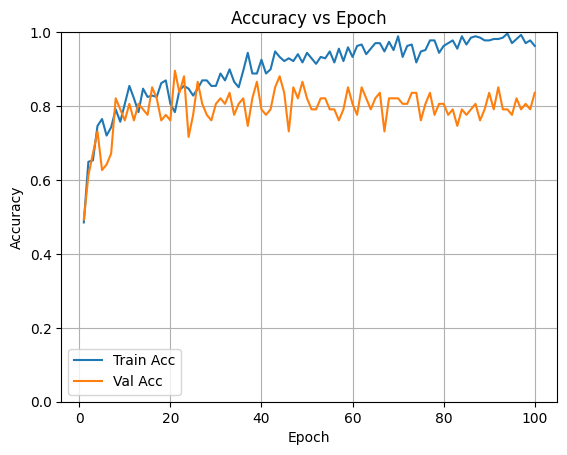

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

# Loss plot
plt.figure()
plt.plot(epochs, train_losses, label='Train Loss')
plt.plot(epochs, val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

# Akurasi plot
plt.figure()
plt.plot(epochs, train_accuracies, label='Train Acc')
plt.plot(epochs, val_accuracies, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.ylim(0, 1)  # Membatasi sumbu y dari 0 sampai 1
plt.legend()
plt.grid(True)
plt.show()

c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


aabyjxwqyo.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
aaeflzzhvy.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
accfrqkrni.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adfzvplbky.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adrqlckutl.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
adsxwxeibr.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
ahencqpiin.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
alzbizkswy.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
aqhbszcpal.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
baqledjaon.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
barbcborgl.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bfkzrgovsv.pt: Predicted = REAL, True = REAL
bfljjbavig.pt: Predicted = FACE-SWAP DEEPFAKE, True = FACE-SWAP DEEPFAKE
bhqcqwcise.pt: Predicted = FACE-SWAP DEEPFAKE, True = REAL
bqwwkjlmgv.pt: Predicted = FACE-SWAP DEEPFAKE, T

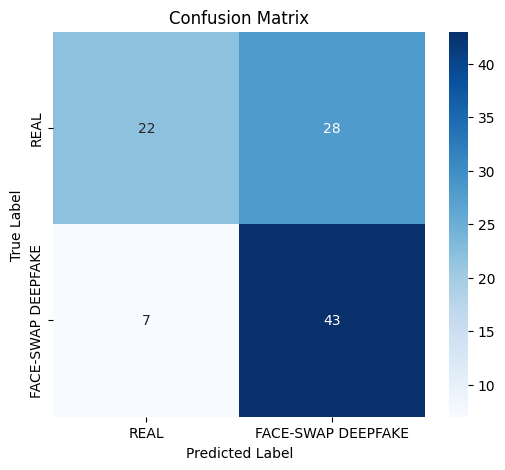


📊 Classification Report:
                    precision    recall  f1-score   support

              REAL       0.76      0.44      0.56        50
FACE-SWAP DEEPFAKE       0.61      0.86      0.71        50

          accuracy                           0.65       100
         macro avg       0.68      0.65      0.63       100
      weighted avg       0.68      0.65      0.63       100


📈 AUC Score: 0.6696


c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:701: RuntimeWarning: divide by zero encountered in divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
c:\Users\krist\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_interpolate.py:704: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


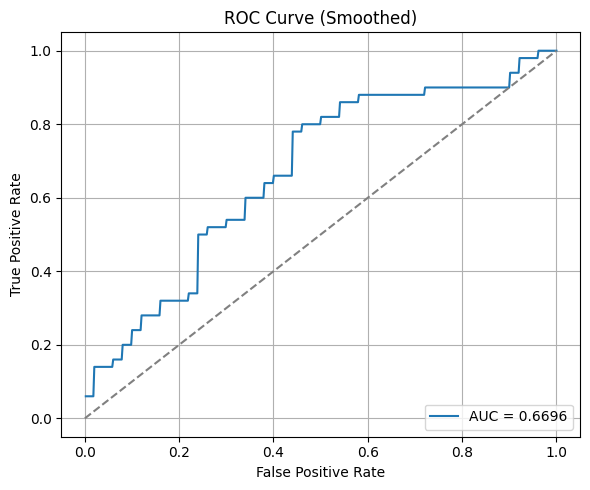

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from scipy.interpolate import interp1d


# Setup device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load model
def load_model(weights_path):
    model = DeepfakeClassifier()
    model.load_state_dict(torch.load(weights_path, map_location=device))
    model.to(device)
    model.eval()
    return model

# Path konfigurasi
model_path = "Model/ResNet18-BiLSTM_Wajah/ResNet18_1024-BiLSTM_3_Wajah_2R1F_100Epoch.pth"
pt_folder = "Dataset Deepfake Preprocessed/Preprocessed Wajah/testing/testing 1080p"
model = load_model(model_path)

classes = ['REAL', 'FACE-SWAP DEEPFAKE']
true_labels = []
predicted_labels = []
probs_class1 = []

# Loop seluruh file
for filename in sorted(os.listdir(pt_folder)):
    if not filename.endswith(".pt"):
        continue

    filepath = os.path.join(pt_folder, filename)
    data = torch.load(filepath)

    frames = torch.stack(data['frames']).unsqueeze(0).to(device)

    true_label = data['label'].item()

    with torch.no_grad():
        outputs = model(frames)
        probabilities = torch.softmax(outputs, dim=1).cpu().numpy()[0]
        predicted = int(np.argmax(probabilities))
        probs_class1.append(probabilities[1])

    print(f"{filename}: Predicted = {classes[predicted]}, True = {classes[true_label]}")

    true_labels.append(true_label)
    predicted_labels.append(predicted)

# Akurasi
total = len(true_labels)
correct = sum(p == t for p, t in zip(predicted_labels, true_labels))
accuracy = correct / total if total > 0 else 0
print(f"\n✅ Testing Accuracy: {accuracy * 100:.2f}% ({correct}/{total})")

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(true_labels, predicted_labels, target_names=classes))

# AUC Score
if len(set(true_labels)) == 2:
    auc_score = roc_auc_score(true_labels, probs_class1)
    print(f"\n📈 AUC Score: {auc_score:.4f}")

    # ROC Curve
    fpr, tpr, thresholds = roc_curve(true_labels, probs_class1)

    fpr_smooth = np.linspace(0, 1, 500)
    tpr_smooth = interp1d(fpr, tpr, kind='linear', fill_value="extrapolate")(fpr_smooth)

    # Plot
    plt.figure(figsize=(6, 5))
    plt.plot(fpr_smooth, tpr_smooth, label=f"AUC = {auc_score:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve (Smoothed)')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ AUC tidak bisa dihitung karena hanya ada satu kelas di label.")